In [1]:
! pip install transformers

from transformers import TFBertModel
import tensorflow as tf
import transformers
from tqdm.auto import tqdm
from transformers import BertTokenizer  
import numpy as np
import os
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report,confusion_matrix
from scipy.special import softmax
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import string
import pandas as pd
import random

!pip install nltk
import nltk
nltk.download('all')
nltk.download('stopwords')
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree


from google.colab import files
uploaded1 = files.upload()
uploaded2 = files.upload()
uploaded3 = files.upload()
uploaded4 = files.upload()
import io


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

Saving X_train.csv to X_train.csv


Saving y_train.csv to y_train.csv


Saving X_test.csv to X_test.csv


Saving y_test.csv to y_test.csv


In [2]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [3]:
x_train_df = pd.read_csv(io.BytesIO(uploaded1['X_train.csv']))
y_train_df = pd.read_csv(io.BytesIO(uploaded2['y_train.csv']))
x_test_df = pd.read_csv(io.BytesIO(uploaded3['X_test.csv']))
y_test_df = pd.read_csv(io.BytesIO(uploaded4['y_test.csv']))

df = pd.DataFrame(index=range(len(x_train_df)),columns=["Facts","winner_index","first_party","second_party"])

for i in range (len(df)):
    df['Facts'].iloc[i] = x_train_df['Facts'].iloc[i]
    df['first_party'].iloc[i] = x_train_df['first_party'].iloc[i]
    df['second_party'].iloc[i] = x_train_df['second_party'].iloc[i]
    df['winner_index'].iloc[i] = y_train_df['winner_index'].iloc[i].item()
        
df_pred = pd.DataFrame(index=range(len(x_test_df)),columns=["Facts","winner_index","first_party","second_party"])

for i in range (len(df_pred)):
    df_pred['Facts'].iloc[i] = x_test_df['Facts'].iloc[i]
    df_pred['first_party'].iloc[i] = x_test_df['first_party'].iloc[i]
    df_pred['second_party'].iloc[i] = x_test_df['second_party'].iloc[i]
    df_pred['winner_index'].iloc[i] = y_test_df['winner_index'].iloc[i].item()

df.head()

Facts winner_index  \
0  On March 26, 1971, the proprietor of a Rochest...            0   
1  This case represents another chapter in the lo...            0   
2  The Pole Attachments Act requires the Federal ...            0   
3  The plaintiffs, employees of the Union Pacific...            1   
4  Lois Davis was an information technology ( IT ...            1   

                                         first_party  \
0                              Irving Jerome Dunaway   
1                                             Kansas   
2  National Cable and Telecommunications Association   
3                     Union Pacific Railroad Company   
4                            Fort Bend County, Texas   

                                        second_party  
0                                  State of New York  
1                                           Colorado  
2                                 Gulf Power Company  
3  Brotherhood of Locomotive Engineers and Trainm...  
4                                      Lois M. Davis

In [4]:
token = tokenizer.encode_plus(
    df['Facts'].iloc[0], 
    max_length=256, 
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True,
    return_tensors='tf'
)

token.input_ids

<tf.Tensor: shape=(1, 256), dtype=int32, numpy=
array([[  101,  1212,  1345,  1744,   117,  2507,   117,  1103, 25543,
         1104,   170, 10425,   117,  1203,  1365, 13473, 21799,  1108,
         1841,  1107,  1126,  3867, 15522,   119,  1212,  1360,  1275,
          117,  2507,   117,  1103,  2021,  1460,   170,  1730, 24034,
         9538,  1916, 12581, 12786,  1605,  2787,   117,  1133,  1103,
         1730,  1225,  1136,  2194,  1536,  1869,  1106,  6040,  1140,
          119,  8094,   117,  1103,  2021,  1814,  1140,  1107,  1111,
        11402,   119,  1124,  1108,  1136,  1500,  1119,  1108,  1223,
         6040,   117,  1133,  1119,  1156,  1129,  8027, 21775,  1191,
         1119,  3867,  1106,  1817,   119,  1258,  1217,  6189,  1104,
         1117,  9120,  2266,   117, 12786,  1605,  2787, 17548,  1117,
         1268,  1106, 12654,  1105,  1189,  8477,  1105,   170,  4619,
         1115,  1107,  1665, 10205, 16868,  1471,   119,  1335,  3443,
          117, 12786,  1605, 

In [5]:
def generate_training_data(df, ids, tokenizer):
    for i, text in tqdm(enumerate(df['Facts'])):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256, 
            truncation=True, 
            padding='max_length', 
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
    return ids


In [6]:
def making_dataset(df):
    X_input_ids = np.zeros((len(df), 256))
    X_input_ids = generate_training_data(df, X_input_ids,tokenizer)
    
    labels = np.zeros((len(df), 2))
    labels[np.arange(len(df)), df['winner_index'].values.astype(int)] = 1 
    
    dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, labels))
    dataset = dataset.shuffle(10000).batch(32, drop_remainder=True)
    
    return dataset

In [7]:
target_labels =[]
for i in range(len(y_test_df)):
    target_labels.append(y_test_df['winner_index'].iloc[i].item())

target_labels=np.array(target_labels)
target_labels_pred = target_labels
target_labels_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,

In [8]:
X_input_ids_pred = np.zeros((len(x_test_df), 256))
X_input_ids_pred = generate_training_data(x_test_df, X_input_ids_pred,tokenizer)


0it [00:00, ?it/s]

In [9]:
def K_fold (train_data):
    n=4
    i=0
    kf = KFold(n_splits=n, random_state=42, shuffle=True)
    
    for train_index, val_index in kf.split(train_data):
        
        # splitting Dataframe (dataset not included)
        i=i+1
        train_df = train_data.iloc[train_index]
        val_df = train_data.iloc[val_index]
        
        if i ==1 :
            train_1 = train_df
            test_1 = val_df
            
        if i ==2 :
            train_2 = train_df
            test_2 = val_df
        if i ==3 :
            train_3 = train_df
            test_3 = val_df
        if i ==4 :
            train_4 = train_df
            test_4 = val_df
           
    return train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4
        

In [10]:
optim = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-6)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')
model = TFBertModel.from_pretrained('bert-base-cased') 

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [11]:
def creating_model (train_dataset , val_dataset , test_dataset):
    
    input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')

    bert_embds = model.bert(input_ids)[1] # 0 -> activation layer (3D), 1 -> pooled output layer (2D)
    intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
    output_layer = tf.keras.layers.Dense(2, activation='softmax', name='output_layer')(intermediate_layer) # softmax -> calcs probs of classes

    sentiment_model = tf.keras.Model(inputs=input_ids, outputs=output_layer)
        
    sentiment_model.compile(optimizer=optim, loss=loss_func, metrics=[acc])
    hist = sentiment_model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=10
        )
    
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    print('Testing model : /n')
    sentiment_model.evaluate(test_dataset)

    return sentiment_model
 

In [12]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [13]:
def balancing_func (d__f):
    r=0
    while r<611:
        i=random.randrange(len(d__f))
        if d__f['winner_index'].iloc[i] == 0:
            d__f=d__f.drop([d__f.index[i]])
            r=r+1
    return d__f

In [14]:
def anonymisation (text , first_party , second_party):
    
    first_words = first_party.split()
    second_words = second_party.split()
    
    nltk_results = ne_chunk(pos_tag(word_tokenize(text)))
    
    for nltk_result in nltk_results:
        if type(nltk_result) == Tree:
            name = ''
            for nltk_result_leaf in nltk_result.leaves():
                name += nltk_result_leaf[0] + ' '
        
                #print ('Type: ', nltk_result.label(), 'Name: ', name)
                if nltk_result.label() != 'PERSON':
                    text = text.replace(name,'anonymized')
            
    text = text.replace(first_party ,'first_party') 
    text = text.replace(second_party , 'second_party')
    for f_w in first_words:
        text = text.replace(f_w , 'first_party')
    for s_w in second_words :
        text = text.replace(s_w , 'second_party')
                            
    return text

In [15]:
# preprocessing function 
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
    #    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text


def preprocessing (d__f):
    for samplee in range(len(d__f)):
        d__f['Facts'].iloc[samplee]=clean_text(d__f['Facts'].iloc[samplee])

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch 1/10
58/58 [==============================] - 108s 2s/step - loss: 0.6684 - accuracy: 0.5932 - val_loss: 0.6292 - val_accuracy: 0.6823
Epoch 2/10
58/58 [==============================] - 97s 2s/step - loss: 0.6267 - accuracy: 0.6584 - val_loss: 0.5432 - val_accuracy: 0.7240
Epoch 3/10
58/58 [==============================] - 97s 2s/step - loss: 0.5434 - accuracy: 0.7263 - val_loss: 0.4035 - val_accuracy: 0.8333
Epoch 4/10
58/58 [==============================] - 96s 2s/step - loss: 0.4048 - accuracy: 0.8260 - val_loss: 0.2377 - val_accuracy: 0.9115
Epoch 5/10
58/58 [==============================] - 97s 2s/step - loss: 0.2453 - accuracy: 0.9009 - val_loss: 0.1217 - val_accuracy: 0.9688
Epoch 6/10
58/58 [==============================] - 97s 2s/step - loss: 0.1182 - accuracy: 0.9580 - val_loss: 0.0578 - val_accuracy: 0.9844
Epoch 7/10
58/58 [==============================] - 97s 2s/step - loss: 0.0571 - accuracy: 0.9806 - val_loss: 0.0080 - val_accuracy: 1.0000
Epoch 8/10
58/58 [=

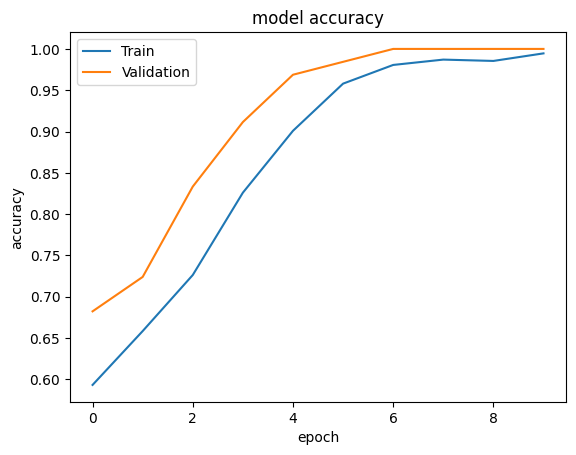

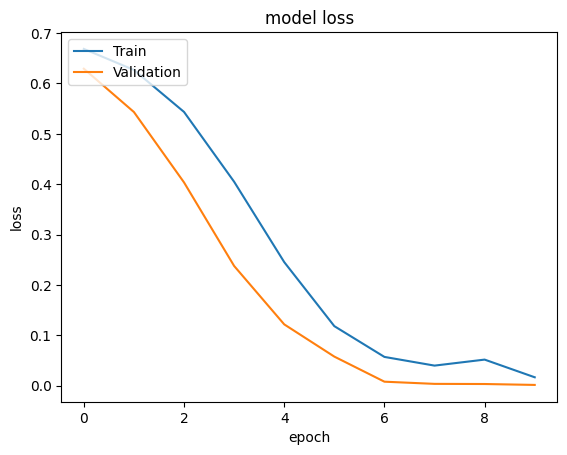

Testing model : /n
22/22 [==============================] - 15s 540ms/step


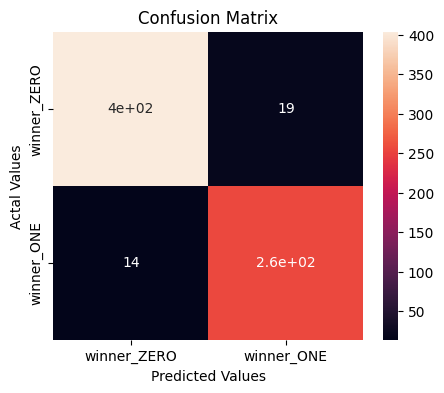

classification_report
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       423
           1       0.93      0.95      0.94       270

    accuracy                           0.95       693
   macro avg       0.95      0.95      0.95       693
weighted avg       0.95      0.95      0.95       693

Epoch 1/10
58/58 [==============================] - 110s 2s/step - loss: 0.1172 - accuracy: 0.9537 - val_loss: 0.0376 - val_accuracy: 0.9844
Epoch 2/10
58/58 [==============================] - 97s 2s/step - loss: 0.0406 - accuracy: 0.9865 - val_loss: 0.0085 - val_accuracy: 0.9948
Epoch 3/10
58/58 [==============================] - 97s 2s/step - loss: 0.0344 - accuracy: 0.9876 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4/10
58/58 [==============================] - 98s 2s/step - loss: 0.0136 - accuracy: 0.9957 - val_loss: 7.2090e-04 - val_accuracy: 1.0000
Epoch 5/10
58/58 [==============================] - 97s 2s/step - loss: 0.0083 - accu

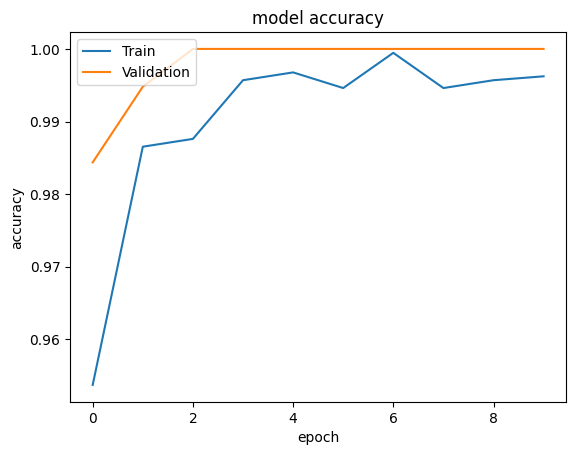

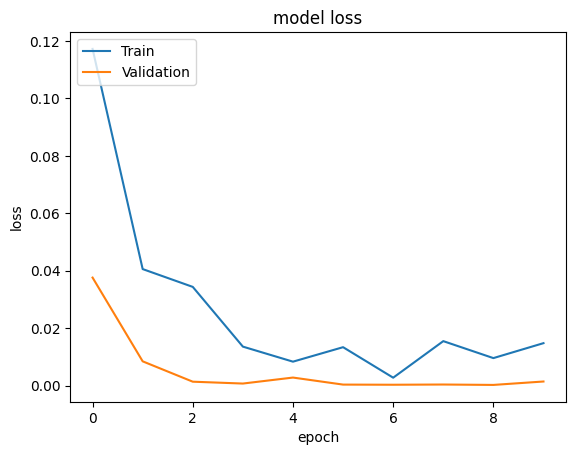

Testing model : /n
22/22 [==============================] - 15s 541ms/step


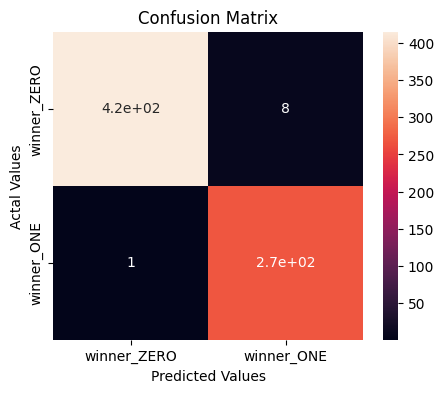

classification_report
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       423
           1       0.97      1.00      0.98       270

    accuracy                           0.99       693
   macro avg       0.98      0.99      0.99       693
weighted avg       0.99      0.99      0.99       693

Epoch 1/10
58/58 [==============================] - 109s 2s/step - loss: 0.0267 - accuracy: 0.9968 - val_loss: 0.0139 - val_accuracy: 0.9948
Epoch 2/10
58/58 [==============================] - 97s 2s/step - loss: 0.0310 - accuracy: 0.9876 - val_loss: 3.5579e-04 - val_accuracy: 1.0000
Epoch 3/10
58/58 [==============================] - 99s 2s/step - loss: 0.0104 - accuracy: 0.9973 - val_loss: 5.4546e-04 - val_accuracy: 1.0000
Epoch 4/10
58/58 [==============================] - 97s 2s/step - loss: 0.0111 - accuracy: 0.9946 - val_loss: 1.5325e-04 - val_accuracy: 1.0000
Epoch 5/10
58/58 [==============================] - 97s 2s/step - loss: 0.006

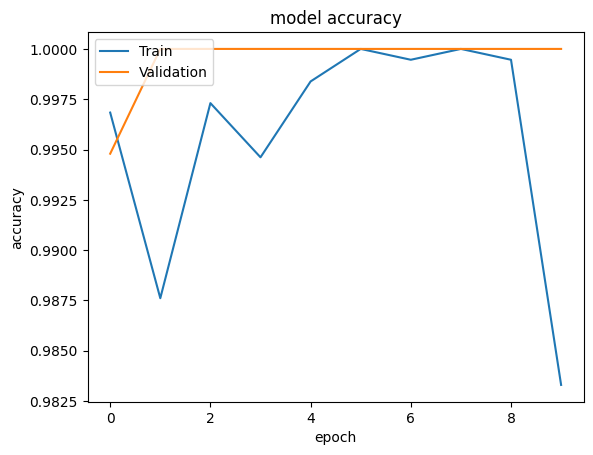

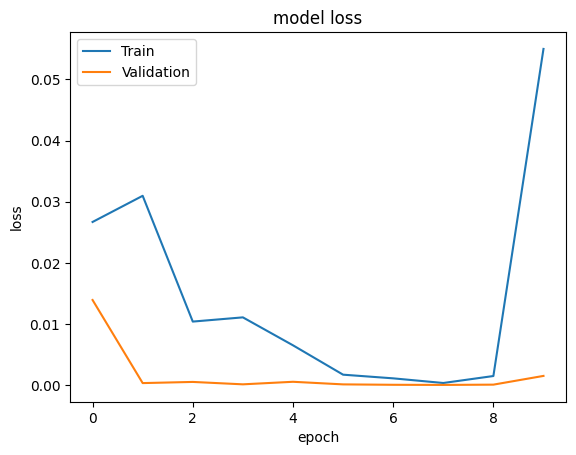

Testing model : /n
22/22 [==============================] - 15s 540ms/step


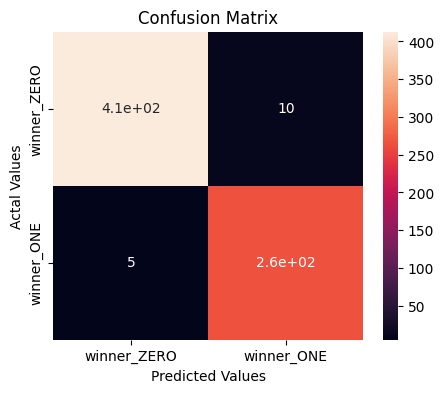

classification_report
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       423
           1       0.96      0.98      0.97       270

    accuracy                           0.98       693
   macro avg       0.98      0.98      0.98       693
weighted avg       0.98      0.98      0.98       693

Epoch 1/10
58/58 [==============================] - 109s 2s/step - loss: 0.0391 - accuracy: 0.9881 - val_loss: 2.3284e-04 - val_accuracy: 1.0000
Epoch 2/10
58/58 [==============================] - 97s 2s/step - loss: 0.0052 - accuracy: 0.9978 - val_loss: 1.6125e-04 - val_accuracy: 1.0000
Epoch 3/10
58/58 [==============================] - 99s 2s/step - loss: 0.0015 - accuracy: 0.9989 - val_loss: 1.9456e-04 - val_accuracy: 1.0000
Epoch 4/10
58/58 [==============================] - 97s 2s/step - loss: 0.0036 - accuracy: 0.9984 - val_loss: 4.3633e-05 - val_accuracy: 1.0000
Epoch 5/10
58/58 [==============================] - 99s 2s/step - loss: 0

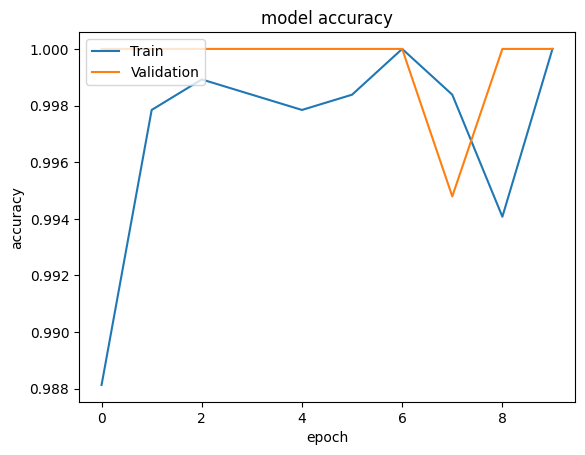

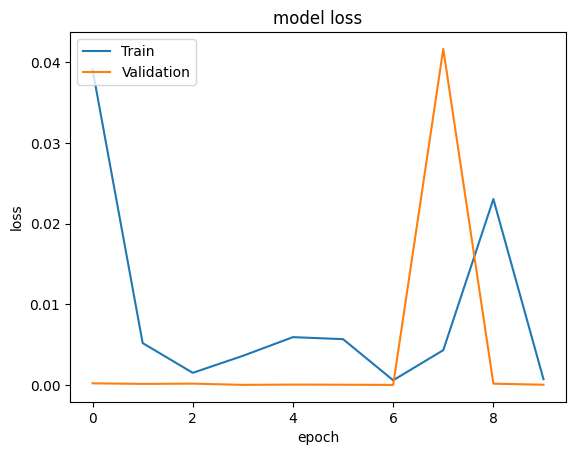

Testing model : /n
22/22 [==============================] - 15s 544ms/step


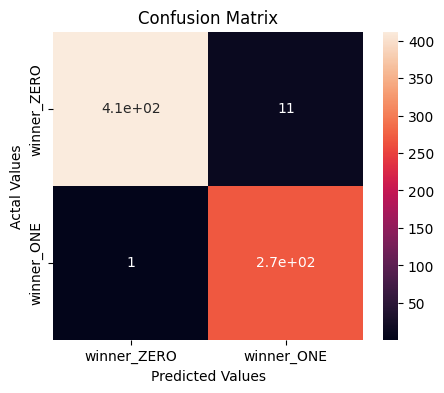

classification_report
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       423
           1       0.96      1.00      0.98       270

    accuracy                           0.98       693
   macro avg       0.98      0.99      0.98       693
weighted avg       0.98      0.98      0.98       693

Acuuracy results of the 4 models :  [0.9523809523809523, 0.987012987012987, 0.9783549783549783, 0.9826839826839827]
Avrage accuracy of this probability = 0.9751082251082251


In [16]:
# No preprocessing-NO Balancing-No Anonymisation (1)

dff = df
p = 0.9

dff_pred = df_pred

X_input_ids_pred = np.zeros((len(dff_pred), 256))
X_input_ids_pred = generate_training_data(dff_pred , X_input_ids_pred , tokenizer)

#-----------------------------------

train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4 = K_fold(dff)

#----------------------------------
train_set_1 = making_dataset(train_1)
train_size = int((len(train_1)/32)*p) 
train_1_dataset = train_set_1.take(train_size)
val_1_dataset = train_set_1.skip(train_size)

test_1_dataset = making_dataset(test_1)

train_set_2 = making_dataset(train_2)
train_size = int((len(train_2)/32)*p) 
train_2_dataset = train_set_2.take(train_size)
val_2_dataset = train_set_2.skip(train_size)

test_2_dataset = making_dataset(test_2)

train_set_3 = making_dataset(train_3)
train_size = int((len(train_3)/32)*p) 
train_3_dataset = train_set_3.take(train_size)
val_3_dataset = train_set_3.skip(train_size)

test_3_dataset = making_dataset(test_3)

train_set_4 = making_dataset(train_4)
train_size = int((len(train_4)/32)*p) 
train_4_dataset = train_set_4.take(train_size)
val_4_dataset = train_set_4.skip(train_size)

test_4_dataset= making_dataset(test_4)

#------------------------------------
acc_result = []

for i in range (4):
    
    if i == 0 :
        
        the_model_1_1 = creating_model(train_1_dataset,val_1_dataset,test_1_dataset)
        y_predict = the_model_1_1.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

        
    if i == 1 :
        the_model_1_2 = creating_model(train_2_dataset,val_2_dataset,test_2_dataset)
        y_predict = the_model_1_2.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

    if i == 2 :
        the_model_1_3 = creating_model(train_3_dataset,val_3_dataset,test_3_dataset)
        y_predict = the_model_1_3.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

    if i == 3 :
        the_model_1_4 = creating_model(train_4_dataset,val_4_dataset,test_4_dataset)
        y_predict = the_model_1_4.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])
        
    
print('Acuuracy results of the 4 models : ',acc_result)
print('Avrage accuracy of this probability =' , sum(acc_result)/len(acc_result))

probability_1 = sum(acc_result)/len(acc_result)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch 1/10
58/58 [==============================] - 118s 2s/step - loss: 0.1847 - accuracy: 0.9115 - val_loss: 0.0268 - val_accuracy: 0.9948
Epoch 2/10
58/58 [==============================] - 106s 2s/step - loss: 0.0488 - accuracy: 0.9828 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 3/10
58/58 [==============================] - 106s 2s/step - loss: 0.0265 - accuracy: 0.9935 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 4/10
58/58 [==============================] - 104s 2s/step - loss: 0.0144 - accuracy: 0.9968 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 5/10
58/58 [==============================] - 105s 2s/step - loss: 0.0121 - accuracy: 0.9968 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 6/10
58/58 [==============================] - 105s 2s/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0103 - val_accuracy: 0.9948
Epoch 7/10
58/58 [==============================] - 105s 2s/step - loss: 0.0231 - accuracy: 0.9908 - val_loss: 0.0185 - val_accuracy: 0.9896
Epoch 8/10
58

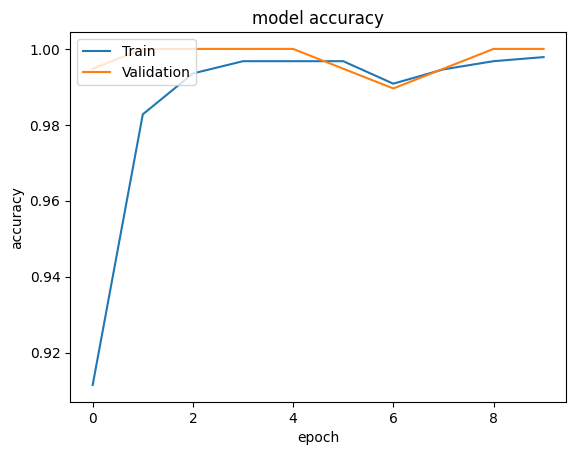

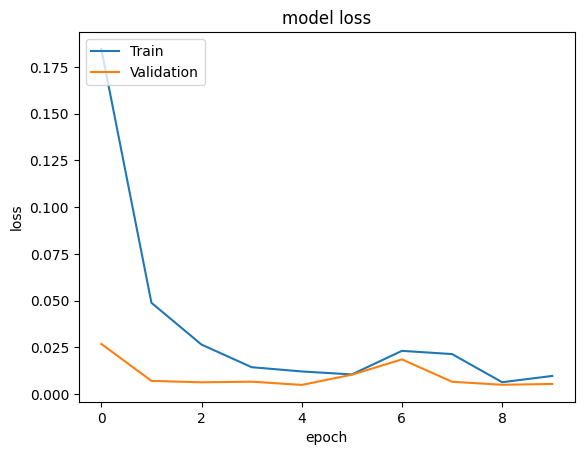

Testing model : /n
22/22 [==============================] - 17s 600ms/step


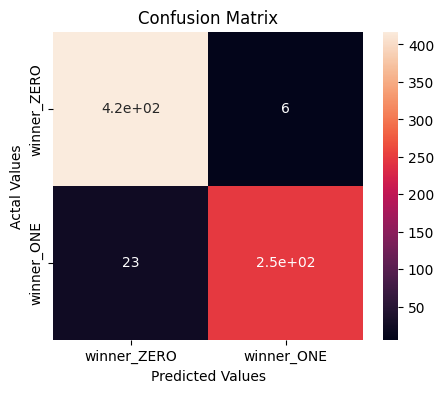

classification_report
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       423
           1       0.98      0.91      0.94       270

    accuracy                           0.96       693
   macro avg       0.96      0.95      0.96       693
weighted avg       0.96      0.96      0.96       693

Epoch 1/10
58/58 [==============================] - 117s 2s/step - loss: 0.1354 - accuracy: 0.9521 - val_loss: 0.0152 - val_accuracy: 0.9948
Epoch 2/10
58/58 [==============================] - 105s 2s/step - loss: 0.0171 - accuracy: 0.9946 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 3/10
58/58 [==============================] - 105s 2s/step - loss: 0.0136 - accuracy: 0.9941 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4/10
58/58 [==============================] - 105s 2s/step - loss: 0.0231 - accuracy: 0.9925 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 5/10
58/58 [==============================] - 105s 2s/step - loss: 0.0111 - accu

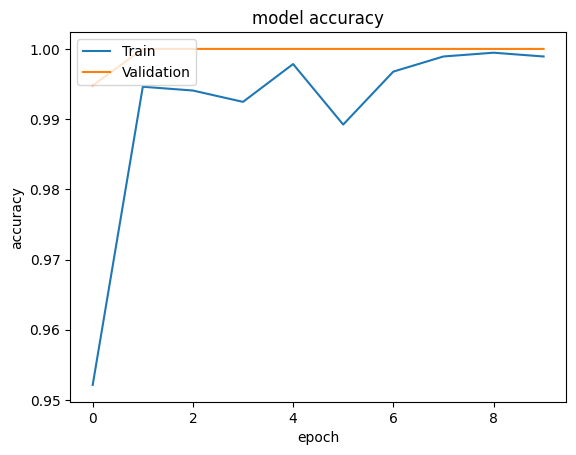

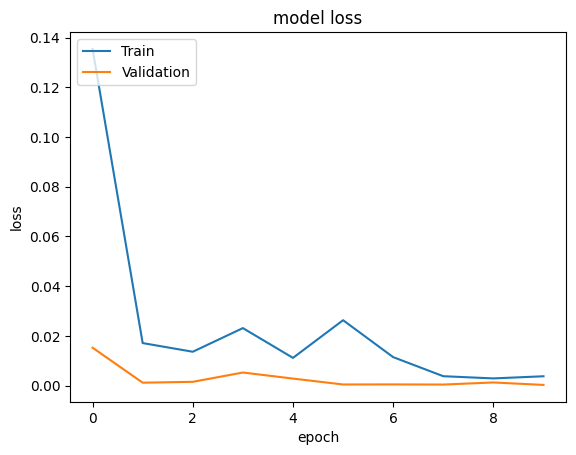

Testing model : /n
22/22 [==============================] - 15s 565ms/step


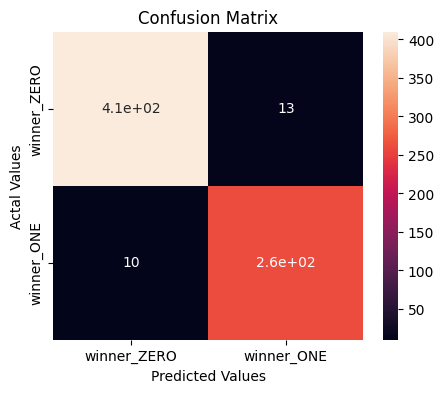

classification_report
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       423
           1       0.95      0.96      0.96       270

    accuracy                           0.97       693
   macro avg       0.96      0.97      0.97       693
weighted avg       0.97      0.97      0.97       693

Epoch 1/10
58/58 [==============================] - 118s 2s/step - loss: 0.0489 - accuracy: 0.9873 - val_loss: 0.0103 - val_accuracy: 0.9948
Epoch 2/10
58/58 [==============================] - 106s 2s/step - loss: 0.0101 - accuracy: 0.9957 - val_loss: 9.7561e-04 - val_accuracy: 1.0000
Epoch 3/10
58/58 [==============================] - 106s 2s/step - loss: 0.0030 - accuracy: 0.9995 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 4/10
58/58 [==============================] - 107s 2s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 5/10
58/58 [==============================] - 106s 2s/step - loss: 0.0028 - 

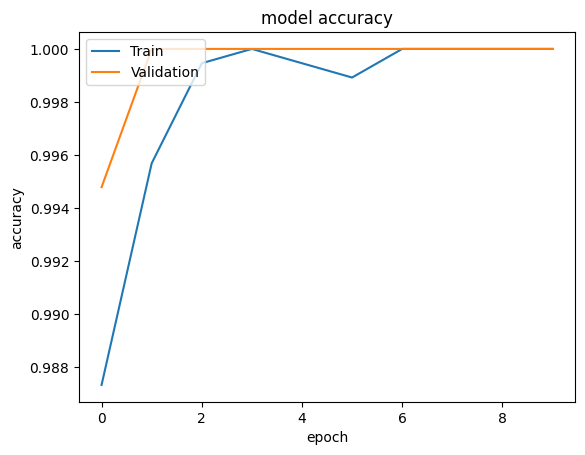

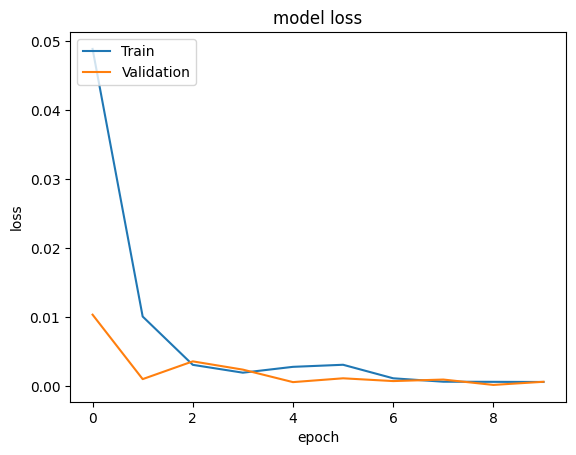

Testing model : /n
22/22 [==============================] - 16s 586ms/step


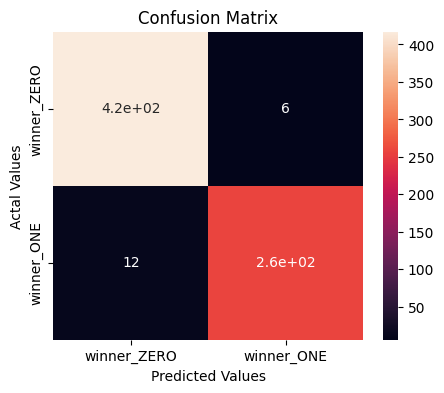

classification_report
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       423
           1       0.98      0.96      0.97       270

    accuracy                           0.97       693
   macro avg       0.97      0.97      0.97       693
weighted avg       0.97      0.97      0.97       693

Epoch 1/10
58/58 [==============================] - 119s 2s/step - loss: 0.0732 - accuracy: 0.9723 - val_loss: 0.0274 - val_accuracy: 0.9948
Epoch 2/10
58/58 [==============================] - 106s 2s/step - loss: 0.0132 - accuracy: 0.9973 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 3/10
58/58 [==============================] - 106s 2s/step - loss: 0.0147 - accuracy: 0.9935 - val_loss: 0.0120 - val_accuracy: 0.9948
Epoch 4/10
58/58 [==============================] - 107s 2s/step - loss: 0.0102 - accuracy: 0.9952 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 5/10
58/58 [==============================] - 106s 2s/step - loss: 0.0137 - accu

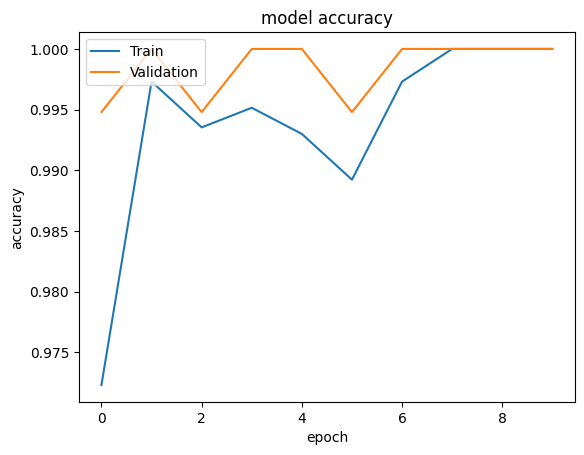

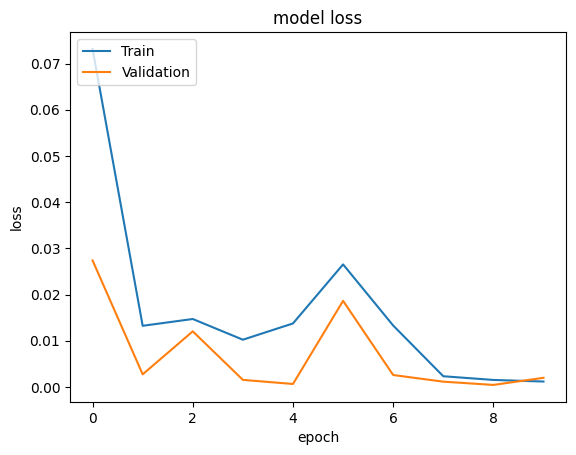

Testing model : /n
22/22 [==============================] - 17s 629ms/step


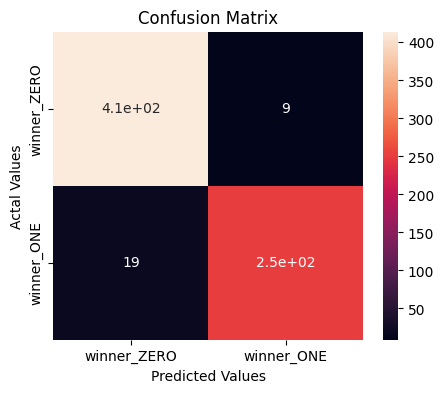

classification_report
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       423
           1       0.97      0.93      0.95       270

    accuracy                           0.96       693
   macro avg       0.96      0.95      0.96       693
weighted avg       0.96      0.96      0.96       693

Acuuracy results of the 4 models :  [0.9581529581529582, 0.9668109668109668, 0.974025974025974, 0.9595959595959596]
Avrage accuracy of this probability = 0.9646464646464645


In [ ]:
# No preprocessing-NO Balancing- Anonymisation (2)

dff=df
p = 0.9
dff_pred = df_pred

#---------------------------------

for i in range (len(dff)):
    dff['Facts'].iloc[i] = anonymisation(dff['Facts'].iloc[i] , dff['first_party'].iloc[i] , dff['second_party'].iloc[i])

for i in range (len(dff_pred)):
    dff_pred['Facts'].iloc[i] = anonymisation(dff_pred['Facts'].iloc[i], dff_pred['first_party'].iloc[i] , dff_pred['second_party'].iloc[i])


#---------------------------------

X_input_ids_pred = np.zeros((len(dff_pred), 256))
X_input_ids_pred = generate_training_data(dff_pred , X_input_ids_pred , tokenizer)

#-----------------------------------

train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4 = K_fold(dff)

#----------------------------------
train_set_1 = making_dataset(train_1)
train_size = int((len(train_1)/32)*p) 
train_1_dataset = train_set_1.take(train_size)
val_1_dataset = train_set_1.skip(train_size)

test_1_dataset = making_dataset(test_1)

train_set_2 = making_dataset(train_2)
train_size = int((len(train_2)/32)*p) 
train_2_dataset = train_set_2.take(train_size)
val_2_dataset = train_set_2.skip(train_size)

test_2_dataset = making_dataset(test_2)

train_set_3 = making_dataset(train_3)
train_size = int((len(train_3)/32)*p) 
train_3_dataset = train_set_3.take(train_size)
val_3_dataset = train_set_3.skip(train_size)

test_3_dataset = making_dataset(test_3)

train_set_4 = making_dataset(train_4)
train_size = int((len(train_4)/32)*p) 
train_4_dataset = train_set_4.take(train_size)
val_4_dataset = train_set_4.skip(train_size)

test_4_dataset= making_dataset(test_4)

#------------------------------------
acc_result = []

for i in range (4):
    
    if i == 0 :
        
        the_model_2_1 = creating_model(train_1_dataset,val_1_dataset,test_1_dataset)
        y_predict = the_model_2_1.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

        
    if i == 1 :
        the_model_2_2 = creating_model(train_2_dataset,val_2_dataset,test_2_dataset)
        y_predict = the_model_2_2.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

    if i == 2 :
        the_model_2_3 = creating_model(train_3_dataset,val_3_dataset,test_3_dataset)
        y_predict = the_model_2_3.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

    if i == 3 :
        the_model_2_4 = creating_model(train_4_dataset,val_4_dataset,test_4_dataset)
        y_predict = the_model_2_4.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])
        
    
print('Acuuracy results of the 4 models : ',acc_result)
print('Avrage accuracy of this probability =' , sum(acc_result)/len(acc_result))

probabilitiy_2=sum(acc_result)/len(acc_result)


2160


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch 1/10
45/45 [==============================] - 89s 2s/step - loss: 0.6970 - accuracy: 0.5528 - val_loss: 0.6692 - val_accuracy: 0.6062
Epoch 2/10
45/45 [==============================] - 77s 2s/step - loss: 0.6801 - accuracy: 0.5833 - val_loss: 0.6900 - val_accuracy: 0.4938
Epoch 3/10
45/45 [==============================] - 77s 2s/step - loss: 0.6656 - accuracy: 0.5924 - val_loss: 0.6350 - val_accuracy: 0.6500
Epoch 4/10
45/45 [==============================] - 79s 2s/step - loss: 0.6317 - accuracy: 0.6438 - val_loss: 0.5716 - val_accuracy: 0.7250
Epoch 5/10
45/45 [==============================] - 79s 2s/step - loss: 0.5699 - accuracy: 0.6965 - val_loss: 0.5129 - val_accuracy: 0.6938
Epoch 6/10
45/45 [==============================] - 77s 2s/step - loss: 0.4729 - accuracy: 0.7521 - val_loss: 0.4353 - val_accuracy: 0.7500
Epoch 7/10
45/45 [==============================] - 77s 2s/step - loss: 0.4062 - accuracy: 0.7792 - val_loss: 0.3471 - val_accuracy: 0.8250
Epoch 8/10
45/45 [==

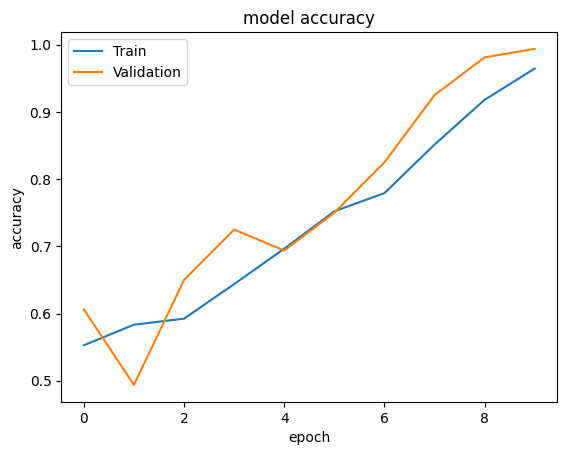

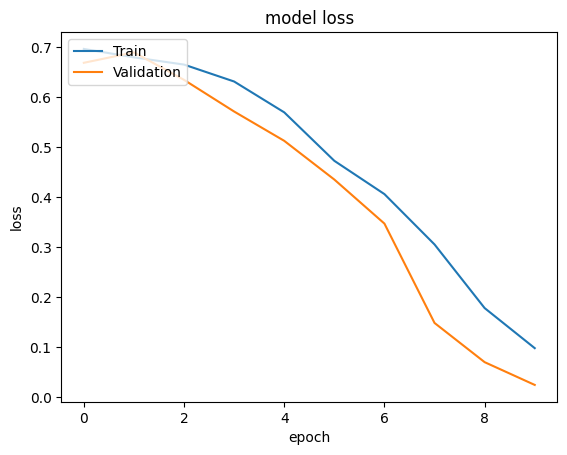

Testing model : /n
22/22 [==============================] - 16s 553ms/step


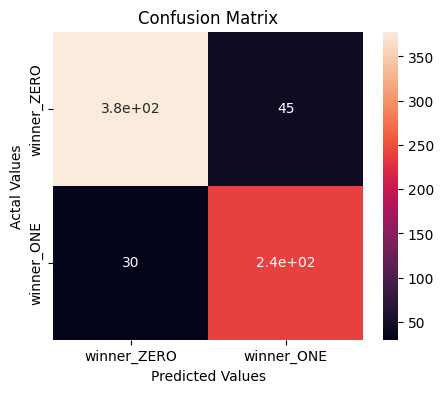

classification_report
               precision    recall  f1-score   support

           0       0.93      0.89      0.91       423
           1       0.84      0.89      0.86       270

    accuracy                           0.89       693
   macro avg       0.88      0.89      0.89       693
weighted avg       0.89      0.89      0.89       693

Epoch 1/10
45/45 [==============================] - 89s 2s/step - loss: 0.3400 - accuracy: 0.8730 - val_loss: 0.0702 - val_accuracy: 0.9812
Epoch 2/10
45/45 [==============================] - 79s 2s/step - loss: 0.1138 - accuracy: 0.9618 - val_loss: 0.0124 - val_accuracy: 1.0000
Epoch 3/10
45/45 [==============================] - 77s 2s/step - loss: 0.1188 - accuracy: 0.9590 - val_loss: 0.0095 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 79s 2s/step - loss: 0.0455 - accuracy: 0.9840 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 77s 2s/step - loss: 0.0341 - accuracy:

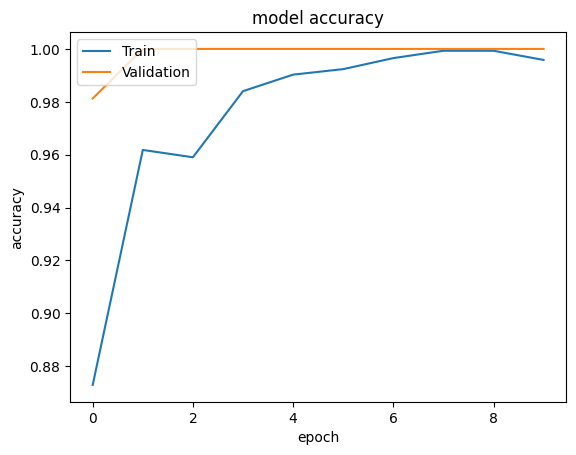

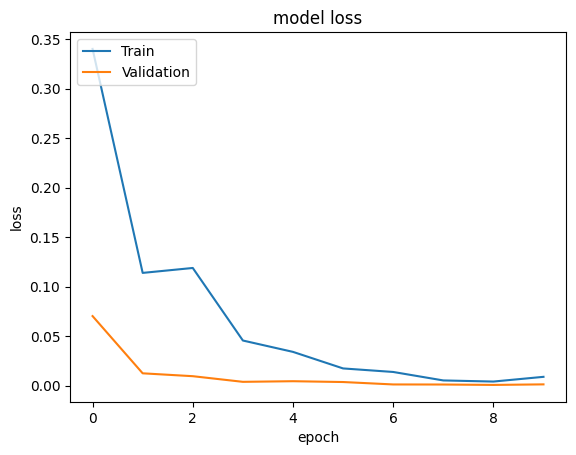

Testing model : /n
22/22 [==============================] - 15s 555ms/step


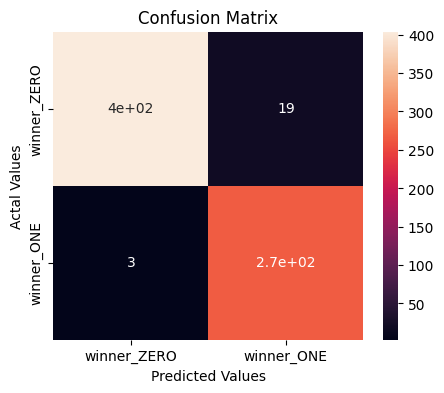

classification_report
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       423
           1       0.93      0.99      0.96       270

    accuracy                           0.97       693
   macro avg       0.96      0.97      0.97       693
weighted avg       0.97      0.97      0.97       693

Epoch 1/10
45/45 [==============================] - 89s 2s/step - loss: 0.0345 - accuracy: 0.9959 - val_loss: 1.4541e-04 - val_accuracy: 1.0000
Epoch 2/10
45/45 [==============================] - 79s 2s/step - loss: 0.0272 - accuracy: 0.9917 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/10
45/45 [==============================] - 79s 2s/step - loss: 0.0194 - accuracy: 0.9931 - val_loss: 0.0402 - val_accuracy: 0.9937
Epoch 4/10
45/45 [==============================] - 77s 2s/step - loss: 0.0250 - accuracy: 0.9910 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 77s 2s/step - loss: 0.0143 - accur

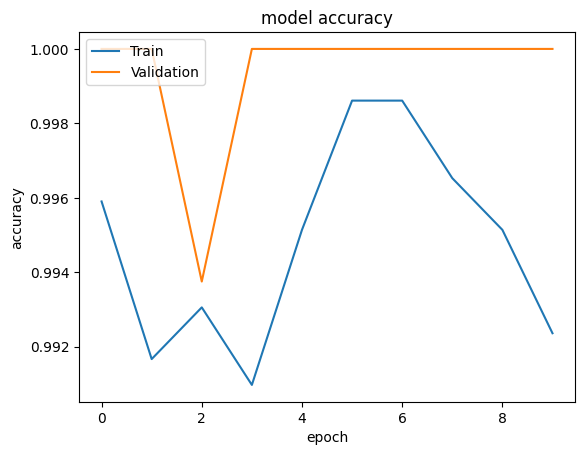

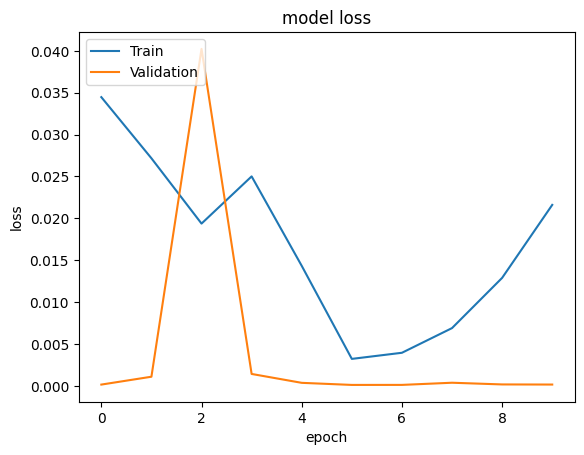

Testing model : /n
22/22 [==============================] - 15s 555ms/step


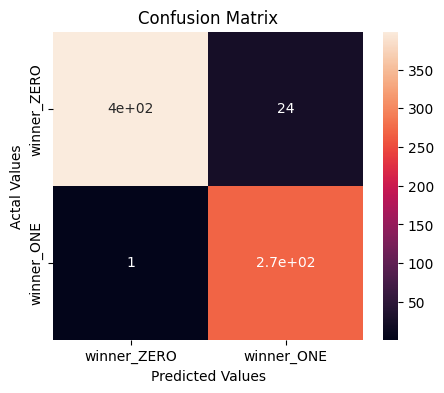

classification_report
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       423
           1       0.92      1.00      0.96       270

    accuracy                           0.96       693
   macro avg       0.96      0.97      0.96       693
weighted avg       0.97      0.96      0.96       693

Epoch 1/10
45/45 [==============================] - 90s 2s/step - loss: 0.0644 - accuracy: 0.9754 - val_loss: 1.7241e-04 - val_accuracy: 1.0000
Epoch 2/10
45/45 [==============================] - 77s 2s/step - loss: 0.0207 - accuracy: 0.9931 - val_loss: 2.9792e-04 - val_accuracy: 1.0000
Epoch 3/10
45/45 [==============================] - 77s 2s/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 2.8663e-04 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 77s 2s/step - loss: 0.0055 - accuracy: 0.9979 - val_loss: 1.4859e-04 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 77s 2s/step - loss: 0.

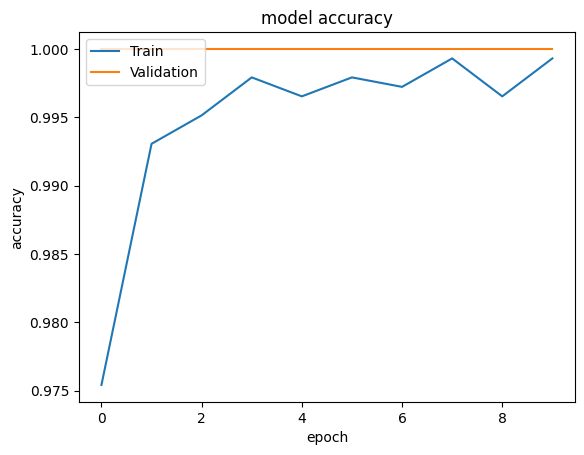

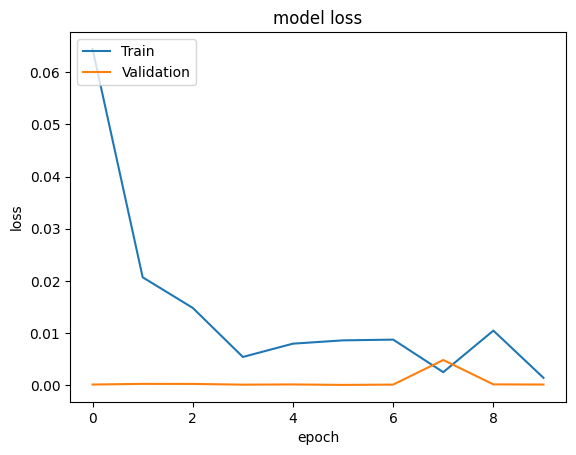

Testing model : /n
22/22 [==============================] - 16s 554ms/step


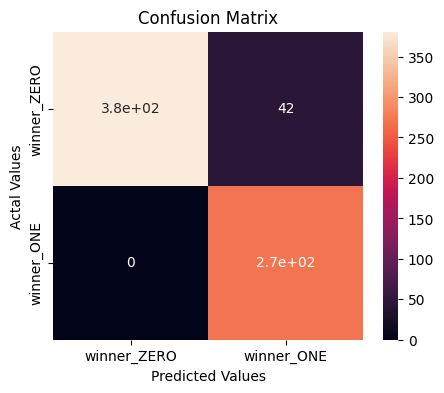

classification_report
               precision    recall  f1-score   support

           0       1.00      0.90      0.95       423
           1       0.87      1.00      0.93       270

    accuracy                           0.94       693
   macro avg       0.93      0.95      0.94       693
weighted avg       0.95      0.94      0.94       693

Acuuracy results of the 4 models :  [0.8917748917748918, 0.9682539682539683, 0.963924963924964, 0.9393939393939394]
Avrage accuracy of this probability = 0.9408369408369408


In [ ]:
# No preprocessing- Balancing - No Anonymisation (3)

dff = df
p = 0.9
dff_pred = df_pred

#---------------------------------

dff=balancing_func(dff)
print(len(dff))

#_--------------------------------

X_input_ids_pred = np.zeros((len(dff_pred), 256))
X_input_ids_pred = generate_training_data(dff_pred , X_input_ids_pred , tokenizer)


#-----------------------------------

train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4 = K_fold(dff)

#----------------------------------
train_set_1 = making_dataset(train_1)
train_size = int((len(train_1)/32)*p) 
train_1_dataset = train_set_1.take(train_size)
val_1_dataset = train_set_1.skip(train_size)

test_1_dataset = making_dataset(test_1)

train_set_2 = making_dataset(train_2)
train_size = int((len(train_2)/32)*p) 
train_2_dataset = train_set_2.take(train_size)
val_2_dataset = train_set_2.skip(train_size)

test_2_dataset = making_dataset(test_2)

train_set_3 = making_dataset(train_3)
train_size = int((len(train_3)/32)*p) 
train_3_dataset = train_set_3.take(train_size)
val_3_dataset = train_set_3.skip(train_size)

test_3_dataset = making_dataset(test_3)

train_set_4 = making_dataset(train_4)
train_size = int((len(train_4)/32)*p) 
train_4_dataset = train_set_4.take(train_size)
val_4_dataset = train_set_4.skip(train_size)

test_4_dataset= making_dataset(test_4)

#------------------------------------
acc_result = []

for i in range (4):
    
    if i == 0 :
        
        the_model_3_1 = creating_model(train_1_dataset,val_1_dataset,test_1_dataset)
        y_predict = the_model_3_1.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

        
    if i == 1 :
        the_model_3_2 = creating_model(train_2_dataset,val_2_dataset,test_2_dataset)
        y_predict = the_model_3_2.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

    if i == 2 :
        the_model_3_3 = creating_model(train_3_dataset,val_3_dataset,test_3_dataset)
        y_predict = the_model_3_3.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

    if i == 3 :
        the_model_3_4 = creating_model(train_4_dataset,val_4_dataset,test_4_dataset)
        y_predict = the_model_3_4.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])
        
    
print('Acuuracy results of the 4 models : ',acc_result)
print('Avrage accuracy of this probability =' , sum(acc_result)/len(acc_result))

probabilitiy_3=sum(acc_result)/len(acc_result)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch 1/10
45/45 [==============================] - 92s 2s/step - loss: 0.6875 - accuracy: 0.5368 - val_loss: 0.6188 - val_accuracy: 0.6812
Epoch 2/10
45/45 [==============================] - 81s 2s/step - loss: 0.6201 - accuracy: 0.6597 - val_loss: 0.4746 - val_accuracy: 0.8062
Epoch 3/10
45/45 [==============================] - 82s 2s/step - loss: 0.4819 - accuracy: 0.7778 - val_loss: 0.2864 - val_accuracy: 0.9000
Epoch 4/10
45/45 [==============================] - 80s 2s/step - loss: 0.2611 - accuracy: 0.8861 - val_loss: 0.0788 - val_accuracy: 0.9812
Epoch 5/10
45/45 [==============================] - 79s 2s/step - loss: 0.1382 - accuracy: 0.9528 - val_loss: 0.0361 - val_accuracy: 0.9937
Epoch 6/10
45/45 [==============================] - 80s 2s/step - loss: 0.0798 - accuracy: 0.9715 - val_loss: 0.0113 - val_accuracy: 1.0000
Epoch 7/10
45/45 [==============================] - 80s 2s/step - loss: 0.0648 - accuracy: 0.9764 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 8/10
45/45 [==

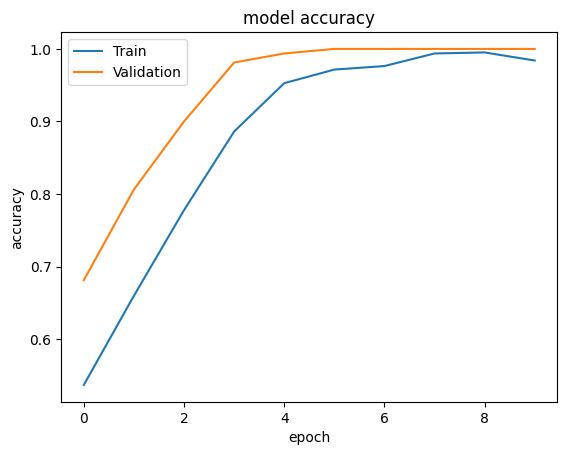

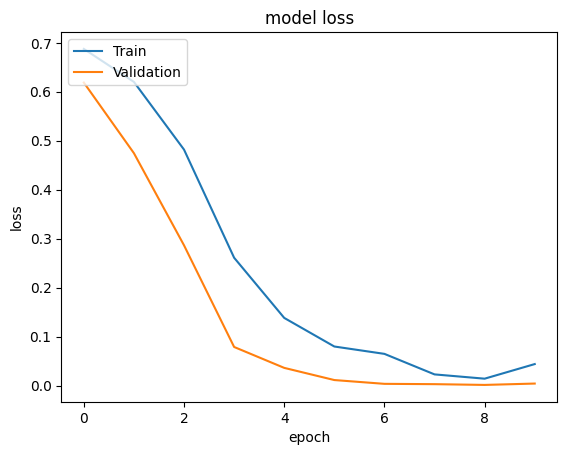

Testing model : /n
22/22 [==============================] - 15s 572ms/step


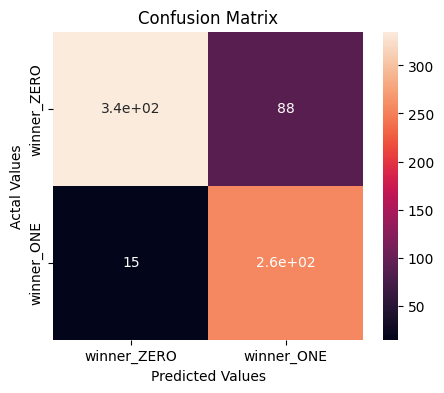

classification_report
               precision    recall  f1-score   support

           0       0.96      0.79      0.87       423
           1       0.74      0.94      0.83       270

    accuracy                           0.85       693
   macro avg       0.85      0.87      0.85       693
weighted avg       0.87      0.85      0.85       693

Epoch 1/10
45/45 [==============================] - 94s 2s/step - loss: 0.1977 - accuracy: 0.9103 - val_loss: 0.0528 - val_accuracy: 0.9688
Epoch 2/10
45/45 [==============================] - 80s 2s/step - loss: 0.0757 - accuracy: 0.9757 - val_loss: 0.0092 - val_accuracy: 1.0000
Epoch 3/10
45/45 [==============================] - 82s 2s/step - loss: 0.0444 - accuracy: 0.9840 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 80s 2s/step - loss: 0.0324 - accuracy: 0.9889 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 80s 2s/step - loss: 0.0138 - accuracy:

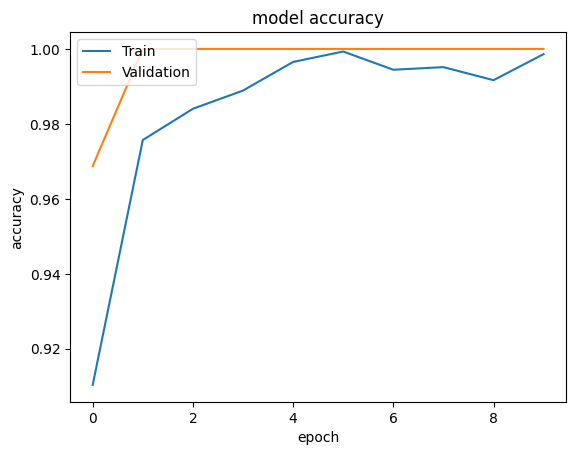

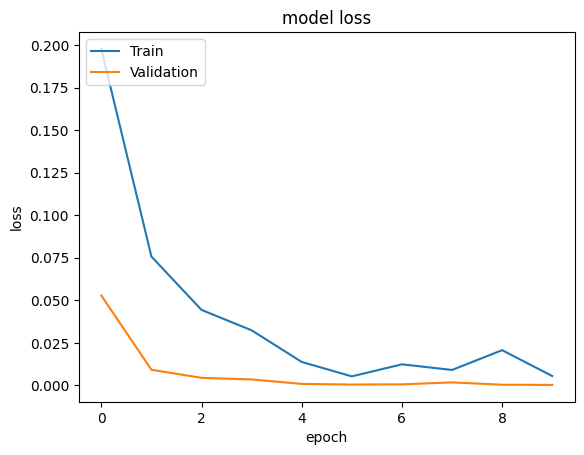

Testing model : /n
22/22 [==============================] - 15s 562ms/step


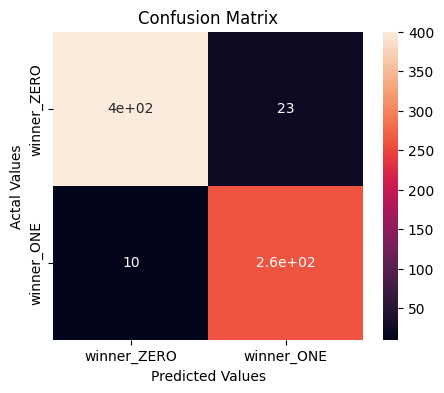

classification_report
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       423
           1       0.92      0.96      0.94       270

    accuracy                           0.95       693
   macro avg       0.95      0.95      0.95       693
weighted avg       0.95      0.95      0.95       693

Epoch 1/10
45/45 [==============================] - 93s 2s/step - loss: 0.1204 - accuracy: 0.9585 - val_loss: 5.6849e-04 - val_accuracy: 1.0000
Epoch 2/10
45/45 [==============================] - 80s 2s/step - loss: 0.0206 - accuracy: 0.9931 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 3/10
45/45 [==============================] - 80s 2s/step - loss: 0.0066 - accuracy: 0.9965 - val_loss: 4.3270e-04 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 80s 2s/step - loss: 0.0054 - accuracy: 0.9979 - val_loss: 3.9657e-04 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 80s 2s/step - loss: 0.0018

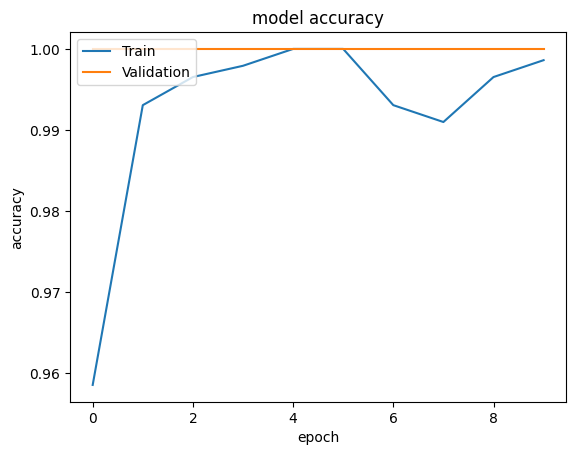

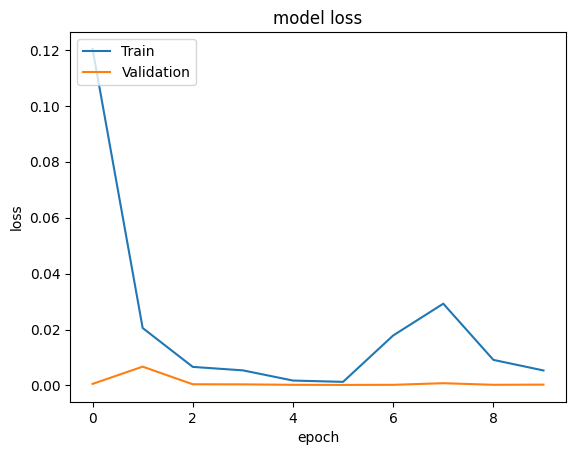

Testing model : /n
22/22 [==============================] - 16s 569ms/step


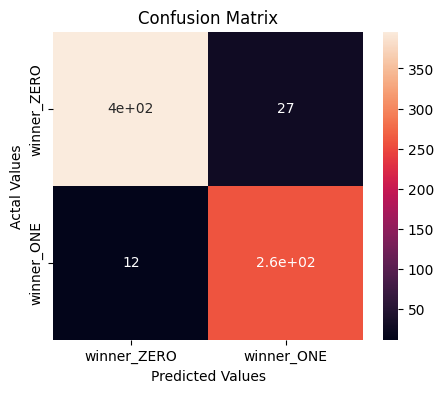

classification_report
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       423
           1       0.91      0.96      0.93       270

    accuracy                           0.94       693
   macro avg       0.94      0.95      0.94       693
weighted avg       0.95      0.94      0.94       693

Epoch 1/10
45/45 [==============================] - 94s 2s/step - loss: 0.0162 - accuracy: 0.9974 - val_loss: 3.5476e-05 - val_accuracy: 1.0000
Epoch 2/10
45/45 [==============================] - 80s 2s/step - loss: 0.0090 - accuracy: 0.9965 - val_loss: 6.7217e-05 - val_accuracy: 1.0000
Epoch 3/10
45/45 [==============================] - 80s 2s/step - loss: 0.0181 - accuracy: 0.9937 - val_loss: 1.8296e-04 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 82s 2s/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 4.2105e-05 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 82s 2s/step - loss: 0.

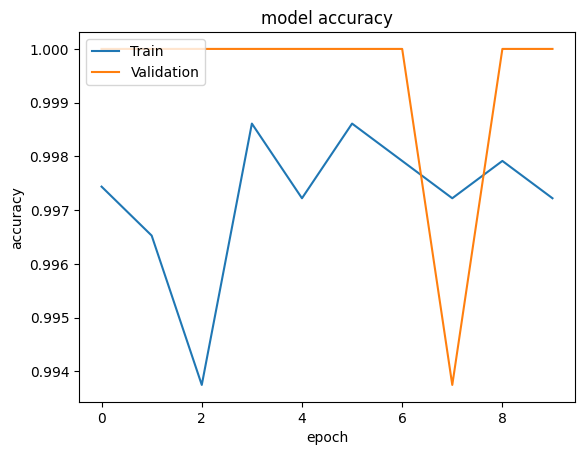

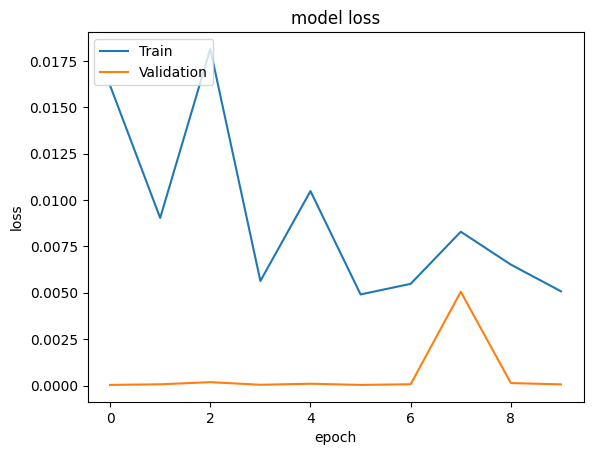

Testing model : /n
22/22 [==============================] - 15s 567ms/step


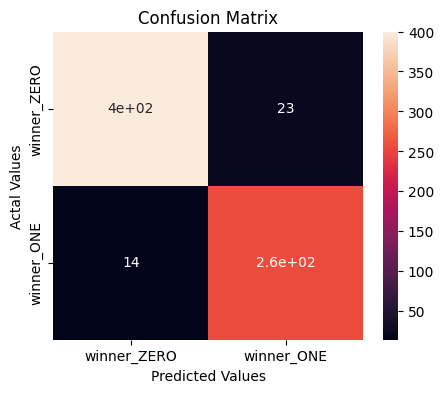

classification_report
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       423
           1       0.92      0.95      0.93       270

    accuracy                           0.95       693
   macro avg       0.94      0.95      0.94       693
weighted avg       0.95      0.95      0.95       693

Acuuracy results of the 4 models :  [0.8513708513708513, 0.9523809523809523, 0.9437229437229437, 0.9466089466089466]
Avrage accuracy of this probability = 0.9235209235209235


In [ ]:
# No preprocessing- Balancing -  Anonymisation (4)

dff = df
p = 0.9
dff_pred = df_pred

#---------------------------------

dff = balancing_func(dff)

for i in range (len(dff)):
    dff['Facts'].iloc[i] = anonymisation(dff['Facts'].iloc[i] , dff['first_party'].iloc[i] , dff['second_party'].iloc[i])

for i in range (len(dff_pred)):
    dff_pred['Facts'].iloc[i] = anonymisation(dff_pred['Facts'].iloc[i], dff_pred['first_party'].iloc[i] , dff_pred['second_party'].iloc[i])

#-------------------------------------

X_input_ids_pred = np.zeros((len(dff_pred), 256))
X_input_ids_pred = generate_training_data(dff_pred , X_input_ids_pred , tokenizer)

#-----------------------------------

train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4 = K_fold(dff)

#----------------------------------
train_set_1 = making_dataset(train_1)
train_size = int((len(train_1)/32)*p) 
train_1_dataset = train_set_1.take(train_size)
val_1_dataset = train_set_1.skip(train_size)

test_1_dataset = making_dataset(test_1)

train_set_2 = making_dataset(train_2)
train_size = int((len(train_2)/32)*p) 
train_2_dataset = train_set_2.take(train_size)
val_2_dataset = train_set_2.skip(train_size)

test_2_dataset = making_dataset(test_2)

train_set_3 = making_dataset(train_3)
train_size = int((len(train_3)/32)*p) 
train_3_dataset = train_set_3.take(train_size)
val_3_dataset = train_set_3.skip(train_size)

test_3_dataset = making_dataset(test_3)

train_set_4 = making_dataset(train_4)
train_size = int((len(train_4)/32)*p) 
train_4_dataset = train_set_4.take(train_size)
val_4_dataset = train_set_4.skip(train_size)

test_4_dataset= making_dataset(test_4)

#------------------------------------
acc_result = []

for i in range (4):
    
    if i == 0 :
        
        the_model_4_1 = creating_model(train_1_dataset,val_1_dataset,test_1_dataset)
        y_predict = the_model_4_1.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

        
    if i == 1 :
        the_model_4_2 = creating_model(train_2_dataset,val_2_dataset,test_2_dataset)
        y_predict = the_model_4_2.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

    if i == 2 :
        the_model_4_3 = creating_model(train_3_dataset,val_3_dataset,test_3_dataset)
        y_predict = the_model_4_3.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

    if i == 3 :
        the_model_4_4 = creating_model(train_4_dataset,val_4_dataset,test_4_dataset)
        y_predict = the_model_4_4.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])
        
    
print('Acuuracy results of the 4 models : ',acc_result)
print('Avrage accuracy of this probability =' , sum(acc_result)/len(acc_result))

probabilitiy_4 = sum(acc_result)/len(acc_result)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch 1/10
58/58 [==============================] - 111s 2s/step - loss: 0.5746 - accuracy: 0.7801 - val_loss: 0.2587 - val_accuracy: 0.8906
Epoch 2/10
58/58 [==============================] - 97s 2s/step - loss: 0.2661 - accuracy: 0.8960 - val_loss: 0.0824 - val_accuracy: 0.9688
Epoch 3/10
58/58 [==============================] - 97s 2s/step - loss: 0.1292 - accuracy: 0.9477 - val_loss: 0.0457 - val_accuracy: 0.9792
Epoch 4/10
58/58 [==============================] - 97s 2s/step - loss: 0.0992 - accuracy: 0.9628 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 5/10
58/58 [==============================] - 97s 2s/step - loss: 0.0301 - accuracy: 0.9898 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 6/10
58/58 [==============================] - 97s 2s/step - loss: 0.0247 - accuracy: 0.9935 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 7/10
58/58 [==============================] - 97s 2s/step - loss: 0.0378 - accuracy: 0.9855 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 8/10
58/58 [=

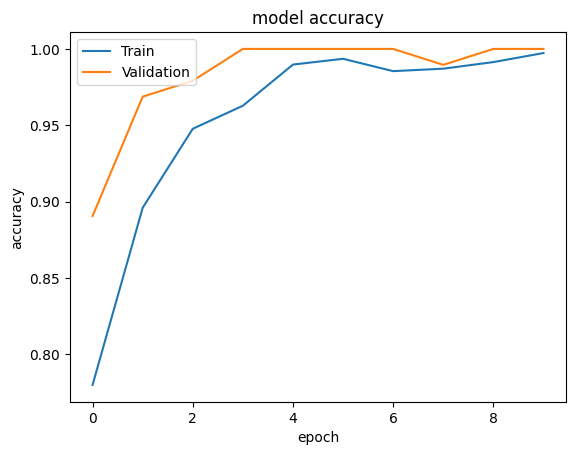

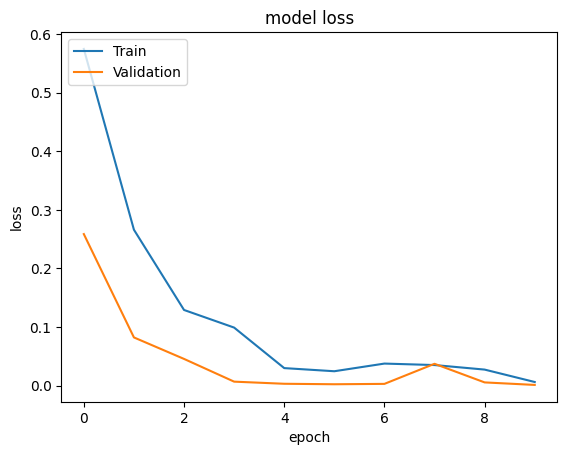

Testing model : /n
22/22 [==============================] - 16s 554ms/step


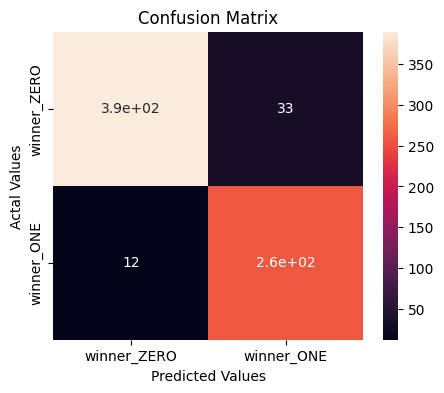

classification_report
               precision    recall  f1-score   support

           0       0.97      0.92      0.95       423
           1       0.89      0.96      0.92       270

    accuracy                           0.94       693
   macro avg       0.93      0.94      0.93       693
weighted avg       0.94      0.94      0.94       693

Epoch 1/10
58/58 [==============================] - 111s 2s/step - loss: 0.0877 - accuracy: 0.9593 - val_loss: 0.0299 - val_accuracy: 0.9896
Epoch 2/10
58/58 [==============================] - 97s 2s/step - loss: 0.0450 - accuracy: 0.9849 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3/10
58/58 [==============================] - 97s 2s/step - loss: 0.0360 - accuracy: 0.9876 - val_loss: 7.3388e-04 - val_accuracy: 1.0000
Epoch 4/10
58/58 [==============================] - 97s 2s/step - loss: 0.0189 - accuracy: 0.9935 - val_loss: 9.8374e-04 - val_accuracy: 1.0000
Epoch 5/10
58/58 [==============================] - 97s 2s/step - loss: 0.0042 - 

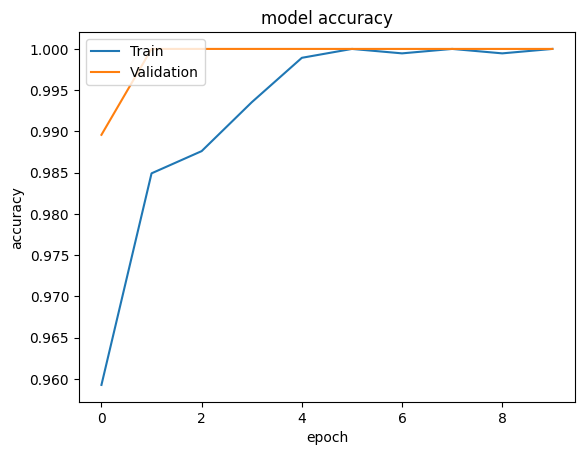

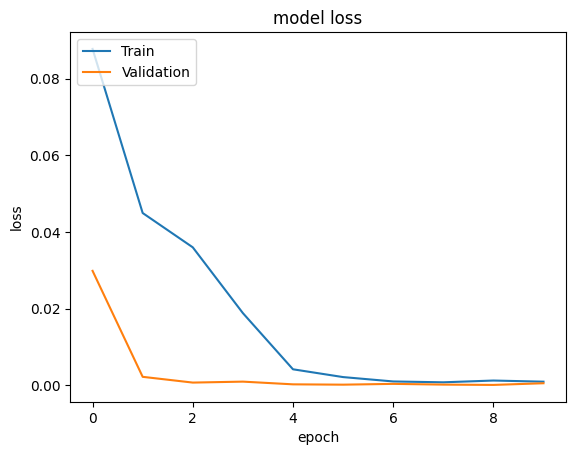

Testing model : /n
22/22 [==============================] - 16s 553ms/step


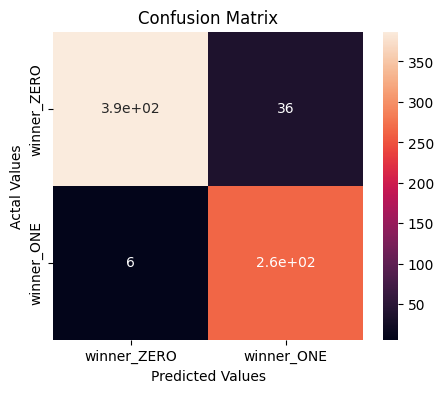

classification_report
               precision    recall  f1-score   support

           0       0.98      0.91      0.95       423
           1       0.88      0.98      0.93       270

    accuracy                           0.94       693
   macro avg       0.93      0.95      0.94       693
weighted avg       0.94      0.94      0.94       693

Epoch 1/10
58/58 [==============================] - 110s 2s/step - loss: 0.0831 - accuracy: 0.9715 - val_loss: 5.1577e-04 - val_accuracy: 1.0000
Epoch 2/10
58/58 [==============================] - 97s 2s/step - loss: 0.0322 - accuracy: 0.9892 - val_loss: 4.1167e-04 - val_accuracy: 1.0000
Epoch 3/10
58/58 [==============================] - 97s 2s/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.0137 - val_accuracy: 0.9948
Epoch 4/10
58/58 [==============================] - 97s 2s/step - loss: 0.0082 - accuracy: 0.9962 - val_loss: 1.8720e-04 - val_accuracy: 1.0000
Epoch 5/10
58/58 [==============================] - 97s 2s/step - loss: 0.015

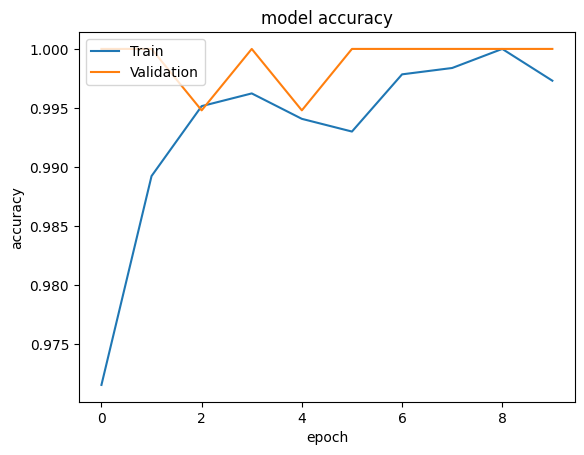

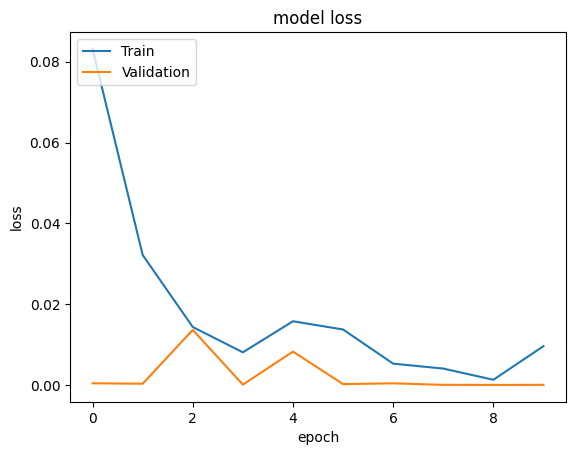

Testing model : /n
22/22 [==============================] - 15s 545ms/step


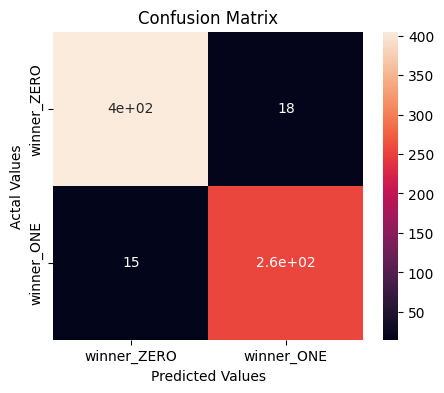

classification_report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       423
           1       0.93      0.94      0.94       270

    accuracy                           0.95       693
   macro avg       0.95      0.95      0.95       693
weighted avg       0.95      0.95      0.95       693

Epoch 1/10
58/58 [==============================] - 111s 2s/step - loss: 0.0825 - accuracy: 0.9771 - val_loss: 3.9702e-04 - val_accuracy: 1.0000
Epoch 2/10
58/58 [==============================] - 97s 2s/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 3.6261e-04 - val_accuracy: 1.0000
Epoch 3/10
58/58 [==============================] - 99s 2s/step - loss: 0.0106 - accuracy: 0.9962 - val_loss: 0.0162 - val_accuracy: 0.9948
Epoch 4/10
58/58 [==============================] - 97s 2s/step - loss: 0.0164 - accuracy: 0.9930 - val_loss: 0.0104 - val_accuracy: 0.9948
Epoch 5/10
58/58 [==============================] - 97s 2s/step - loss: 0.0059 - 

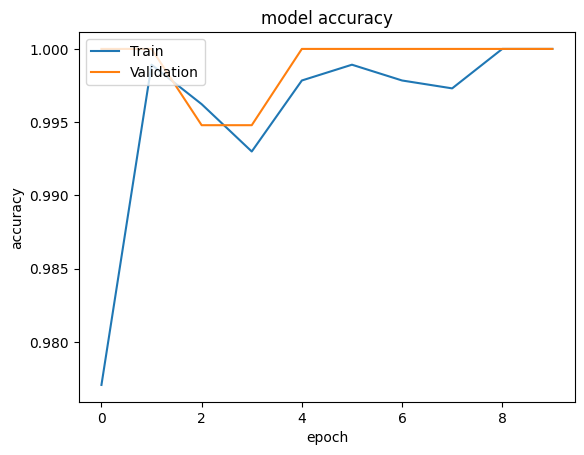

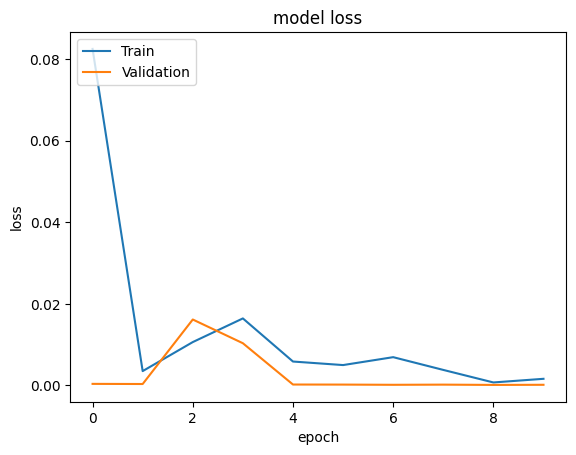

Testing model : /n
22/22 [==============================] - 15s 548ms/step


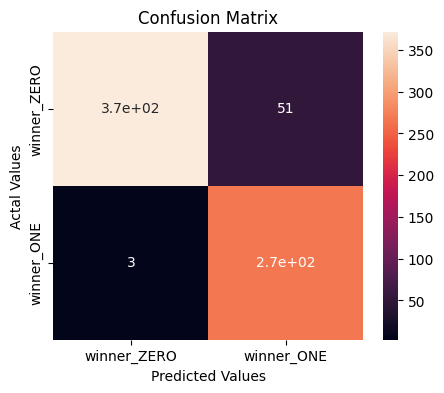

classification_report
               precision    recall  f1-score   support

           0       0.99      0.88      0.93       423
           1       0.84      0.99      0.91       270

    accuracy                           0.92       693
   macro avg       0.92      0.93      0.92       693
weighted avg       0.93      0.92      0.92       693

Acuuracy results of the 4 models :  [0.935064935064935, 0.9393939393939394, 0.9523809523809523, 0.922077922077922]
Avrage accuracy of this probability = 0.9372294372294372


In [ ]:
#  preprocessing- No Balancing -  No Anonymisation (5)

dff = df
p = 0.9
dff_pred = df_pred

#---------------------------------

preprocessing (dff)
preprocessing (dff_pred)

#--------------------------------

X_input_ids_pred = np.zeros((len(dff_pred), 256))
X_input_ids_pred = generate_training_data(dff_pred , X_input_ids_pred , tokenizer)

#-----------------------------------

train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4 = K_fold(dff)

#----------------------------------
train_set_1 = making_dataset(train_1)
train_size = int((len(train_1)/32)*p) 
train_1_dataset = train_set_1.take(train_size)
val_1_dataset = train_set_1.skip(train_size)

test_1_dataset = making_dataset(test_1)

train_set_2 = making_dataset(train_2)
train_size = int((len(train_2)/32)*p) 
train_2_dataset = train_set_2.take(train_size)
val_2_dataset = train_set_2.skip(train_size)

test_2_dataset = making_dataset(test_2)

train_set_3 = making_dataset(train_3)
train_size = int((len(train_3)/32)*p) 
train_3_dataset = train_set_3.take(train_size)
val_3_dataset = train_set_3.skip(train_size)

test_3_dataset = making_dataset(test_3)

train_set_4 = making_dataset(train_4)
train_size = int((len(train_4)/32)*p) 
train_4_dataset = train_set_4.take(train_size)
val_4_dataset = train_set_4.skip(train_size)

test_4_dataset= making_dataset(test_4)

#------------------------------------
acc_result = []

for i in range (4):
    
    if i == 0 :
        
        the_model_5_1 = creating_model(train_1_dataset,val_1_dataset,test_1_dataset)
        y_predict = the_model_5_1.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

        
    if i == 1 :
        the_model_5_2 = creating_model(train_2_dataset,val_2_dataset,test_2_dataset)
        y_predict = the_model_5_2.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

    if i == 2 :
        the_model_5_3 = creating_model(train_3_dataset,val_3_dataset,test_3_dataset)
        y_predict = the_model_5_3.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

    if i == 3 :
        the_model_5_4 = creating_model(train_4_dataset,val_4_dataset,test_4_dataset)
        y_predict = the_model_5_4.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])
        
    
print('Acuuracy results of the 4 models : ',acc_result)
print('Avrage accuracy of this probability =' , sum(acc_result)/len(acc_result))

probabilitiy_5=sum(acc_result)/len(acc_result)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch 1/10
58/58 [==============================] - 112s 2s/step - loss: 0.0299 - accuracy: 0.9984 - val_loss: 1.2888e-04 - val_accuracy: 1.0000
Epoch 2/10
58/58 [==============================] - 97s 2s/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 8.3369e-05 - val_accuracy: 1.0000
Epoch 3/10
58/58 [==============================] - 97s 2s/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 1.0428e-04 - val_accuracy: 1.0000
Epoch 4/10
58/58 [==============================] - 99s 2s/step - loss: 0.0128 - accuracy: 0.9968 - val_loss: 3.9261e-04 - val_accuracy: 1.0000
Epoch 5/10
58/58 [==============================] - 97s 2s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.5197e-04 - val_accuracy: 1.0000
Epoch 6/10
58/58 [==============================] - 97s 2s/step - loss: 3.1725e-04 - accuracy: 1.0000 - val_loss: 8.1471e-05 - val_accuracy: 1.0000
Epoch 7/10
58/58 [==============================] - 97s 2s/step - loss: 5.6258e-04 - accuracy: 1.0000 - val_loss: 7.7375e-05 - val_

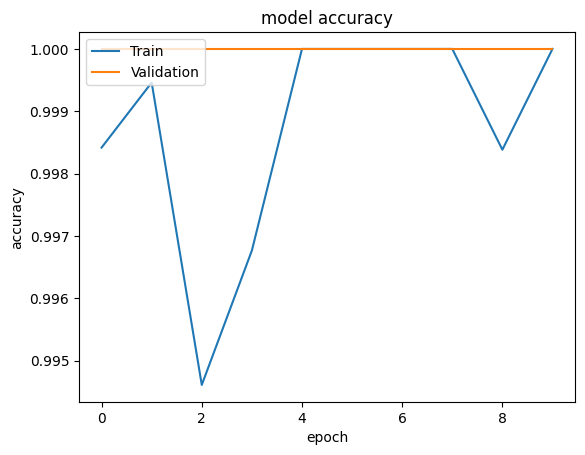

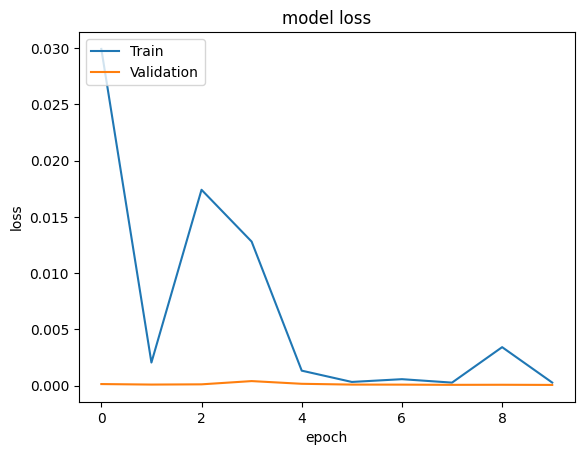

Testing model : /n
22/22 [==============================] - 15s 542ms/step


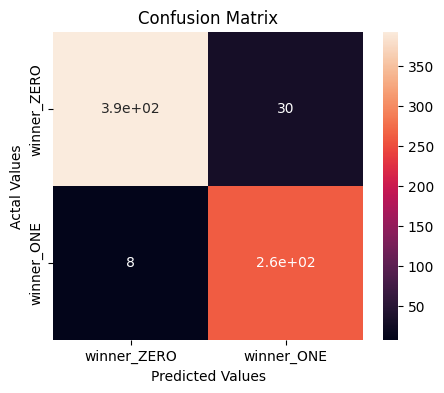

classification_report
               precision    recall  f1-score   support

           0       0.98      0.93      0.95       423
           1       0.90      0.97      0.93       270

    accuracy                           0.95       693
   macro avg       0.94      0.95      0.94       693
weighted avg       0.95      0.95      0.95       693

Epoch 1/10
58/58 [==============================] - 111s 2s/step - loss: 0.0469 - accuracy: 0.9786 - val_loss: 1.2816e-04 - val_accuracy: 1.0000
Epoch 2/10
58/58 [==============================] - 97s 2s/step - loss: 5.6789e-04 - accuracy: 1.0000 - val_loss: 8.9079e-05 - val_accuracy: 1.0000
Epoch 3/10
58/58 [==============================] - 97s 2s/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 3.2703e-04 - val_accuracy: 1.0000
Epoch 4/10
58/58 [==============================] - 99s 2s/step - loss: 0.0104 - accuracy: 0.9968 - val_loss: 5.7683e-04 - val_accuracy: 1.0000
Epoch 5/10
58/58 [==============================] - 97s 2s/step - los

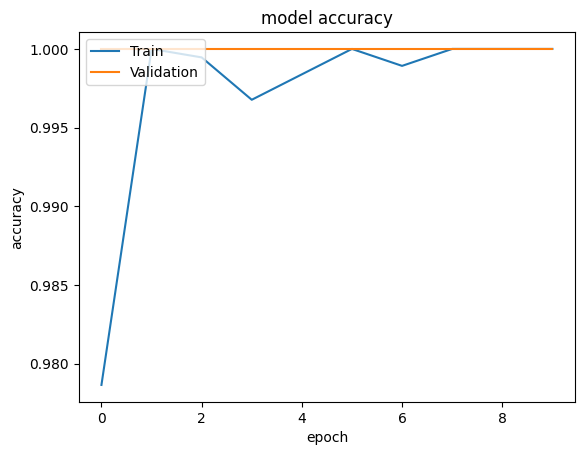

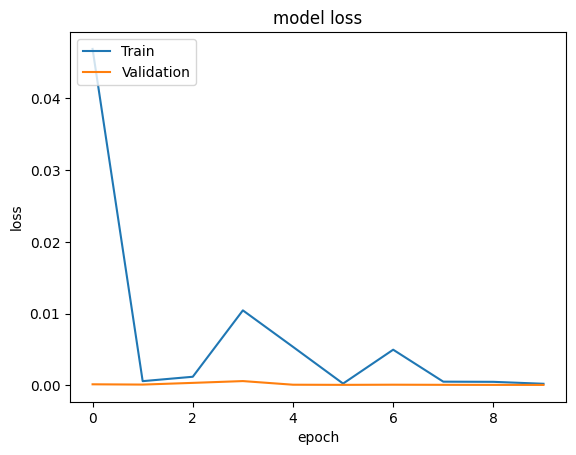

Testing model : /n
22/22 [==============================] - 15s 555ms/step


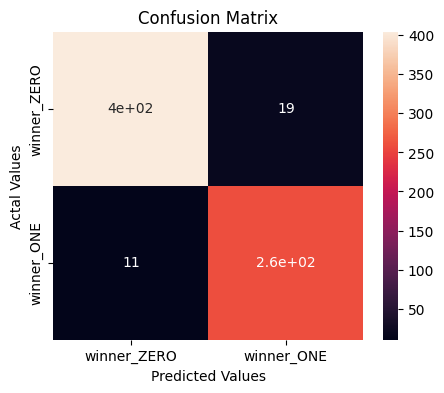

classification_report
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       423
           1       0.93      0.96      0.95       270

    accuracy                           0.96       693
   macro avg       0.95      0.96      0.95       693
weighted avg       0.96      0.96      0.96       693

Epoch 1/10
58/58 [==============================] - 111s 2s/step - loss: 0.0391 - accuracy: 0.9834 - val_loss: 6.1729e-05 - val_accuracy: 1.0000
Epoch 2/10
58/58 [==============================] - 97s 2s/step - loss: 1.3658e-04 - accuracy: 1.0000 - val_loss: 3.6999e-05 - val_accuracy: 1.0000
Epoch 3/10
58/58 [==============================] - 97s 2s/step - loss: 2.8823e-04 - accuracy: 1.0000 - val_loss: 3.1309e-05 - val_accuracy: 1.0000
Epoch 4/10
58/58 [==============================] - 99s 2s/step - loss: 1.5176e-04 - accuracy: 1.0000 - val_loss: 2.9079e-05 - val_accuracy: 1.0000
Epoch 5/10
58/58 [==============================] - 97s 2s/st

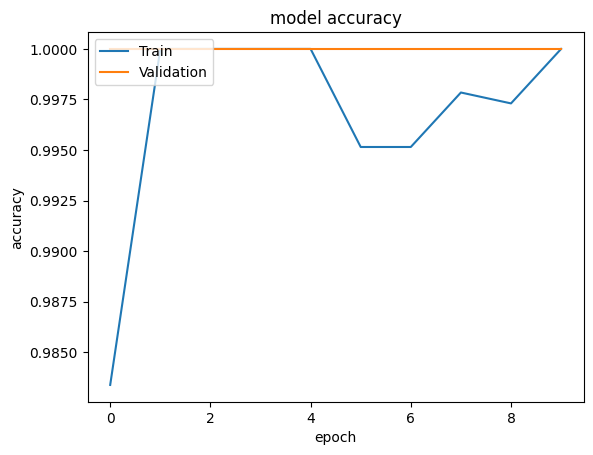

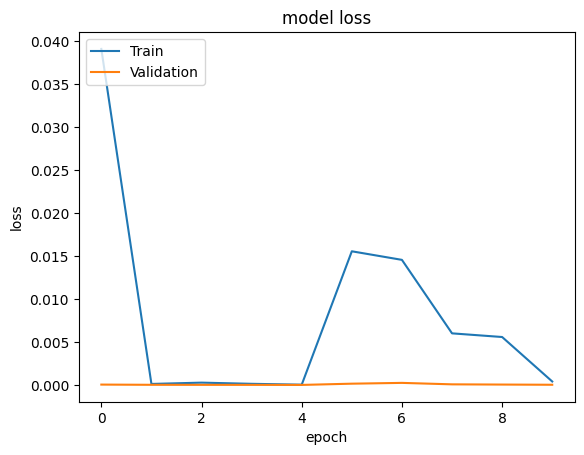

Testing model : /n
22/22 [==============================] - 15s 544ms/step


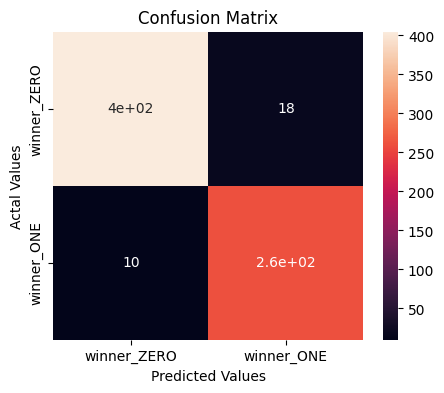

classification_report
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       423
           1       0.94      0.96      0.95       270

    accuracy                           0.96       693
   macro avg       0.96      0.96      0.96       693
weighted avg       0.96      0.96      0.96       693

Epoch 1/10
58/58 [==============================] - 111s 2s/step - loss: 0.1069 - accuracy: 0.9644 - val_loss: 0.0317 - val_accuracy: 0.9896
Epoch 2/10
58/58 [==============================] - 97s 2s/step - loss: 0.0077 - accuracy: 0.9978 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3/10
58/58 [==============================] - 97s 2s/step - loss: 0.0058 - accuracy: 0.9984 - val_loss: 0.0182 - val_accuracy: 0.9948
Epoch 4/10
58/58 [==============================] - 97s 2s/step - loss: 5.6939e-04 - accuracy: 1.0000 - val_loss: 1.6197e-04 - val_accuracy: 1.0000
Epoch 5/10
58/58 [==============================] - 97s 2s/step - loss: 0.0020 - 

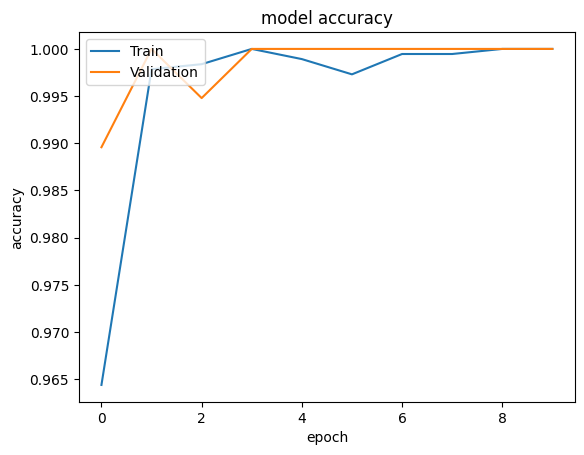

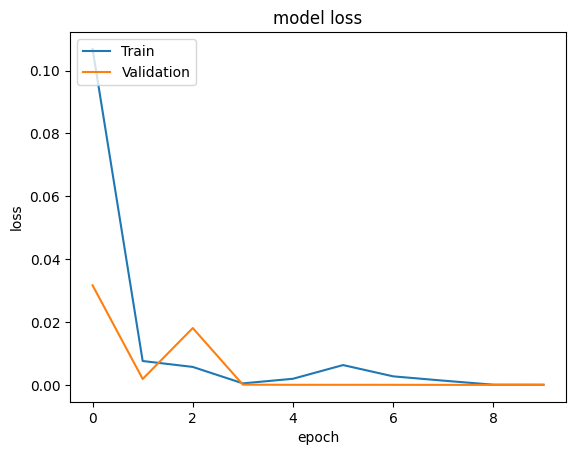

Testing model : /n
22/22 [==============================] - 15s 543ms/step


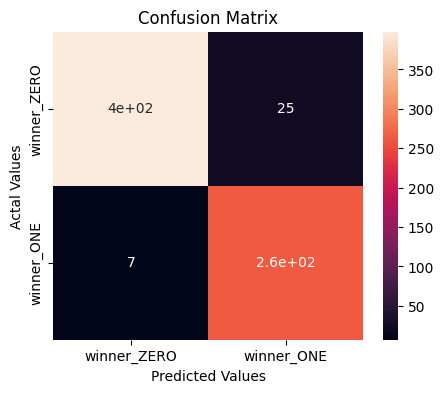

classification_report
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       423
           1       0.91      0.97      0.94       270

    accuracy                           0.95       693
   macro avg       0.95      0.96      0.95       693
weighted avg       0.96      0.95      0.95       693

Acuuracy results of the 4 models :  [0.9451659451659452, 0.9567099567099567, 0.9595959595959596, 0.9538239538239538]
Avrage accuracy of this probability = 0.9538239538239539


In [ ]:
#  preprocessing- No Balancing -   Anonymisation (6)

dff = df
p = 0.9
dff_pred = df_pred

#---------------------------------

for i in range (len(dff)):
    dff['Facts'].iloc[i] = anonymisation(dff['Facts'].iloc[i] , dff['first_party'].iloc[i] , dff['second_party'].iloc[i])

for i in range (len(dff_pred)):
    dff_pred['Facts'].iloc[i] = anonymisation(dff_pred['Facts'].iloc[i], dff_pred['first_party'].iloc[i] , dff_pred['second_party'].iloc[i])

preprocessing (dff)
preprocessing (dff_pred)

#--------------------------------

X_input_ids_pred = np.zeros((len(dff_pred), 256))
X_input_ids_pred = generate_training_data(dff_pred , X_input_ids_pred , tokenizer)

#-----------------------------------

train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4 = K_fold(dff)

#----------------------------------
train_set_1 = making_dataset(train_1)
train_size = int((len(train_1)/32)*p) 
train_1_dataset = train_set_1.take(train_size)
val_1_dataset = train_set_1.skip(train_size)

test_1_dataset = making_dataset(test_1)

train_set_2 = making_dataset(train_2)
train_size = int((len(train_2)/32)*p) 
train_2_dataset = train_set_2.take(train_size)
val_2_dataset = train_set_2.skip(train_size)

test_2_dataset = making_dataset(test_2)

train_set_3 = making_dataset(train_3)
train_size = int((len(train_3)/32)*p) 
train_3_dataset = train_set_3.take(train_size)
val_3_dataset = train_set_3.skip(train_size)

test_3_dataset = making_dataset(test_3)

train_set_4 = making_dataset(train_4)
train_size = int((len(train_4)/32)*p) 
train_4_dataset = train_set_4.take(train_size)
val_4_dataset = train_set_4.skip(train_size)

test_4_dataset= making_dataset(test_4)

#------------------------------------
acc_result = []

for i in range (4):
    
    if i == 0 :
        
        the_model_6_1 = creating_model(train_1_dataset,val_1_dataset,test_1_dataset)
        y_predict = the_model_6_1.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

        
    if i == 1 :
        the_model_6_2 = creating_model(train_2_dataset,val_2_dataset,test_2_dataset)
        y_predict = the_model_6_2.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

    if i == 2 :
        the_model_6_3 = creating_model(train_3_dataset,val_3_dataset,test_3_dataset)
        y_predict = the_model_6_3.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

    if i == 3 :
        the_model_6_4 = creating_model(train_4_dataset,val_4_dataset,test_4_dataset)
        y_predict = the_model_6_4.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])
        
    
print('Acuuracy results of the 4 models : ',acc_result)
print('Avrage accuracy of this probability =' , sum(acc_result)/len(acc_result))

probabilitiy_6=sum(acc_result)/len(acc_result)



0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch 1/10
45/45 [==============================] - 103s 2s/step - loss: 0.6331 - accuracy: 0.7377 - val_loss: 0.4595 - val_accuracy: 0.7937
Epoch 2/10
45/45 [==============================] - 80s 2s/step - loss: 0.3979 - accuracy: 0.8333 - val_loss: 0.1890 - val_accuracy: 0.9500
Epoch 3/10
45/45 [==============================] - 80s 2s/step - loss: 0.2334 - accuracy: 0.9104 - val_loss: 0.0517 - val_accuracy: 0.9875
Epoch 4/10
45/45 [==============================] - 80s 2s/step - loss: 0.1111 - accuracy: 0.9590 - val_loss: 0.0264 - val_accuracy: 0.9937
Epoch 5/10
45/45 [==============================] - 82s 2s/step - loss: 0.0493 - accuracy: 0.9840 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 6/10
45/45 [==============================] - 80s 2s/step - loss: 0.0648 - accuracy: 0.9771 - val_loss: 0.0260 - val_accuracy: 0.9875
Epoch 7/10
45/45 [==============================] - 80s 2s/step - loss: 0.0396 - accuracy: 0.9868 - val_loss: 9.8712e-04 - val_accuracy: 1.0000
Epoch 8/10
45/4

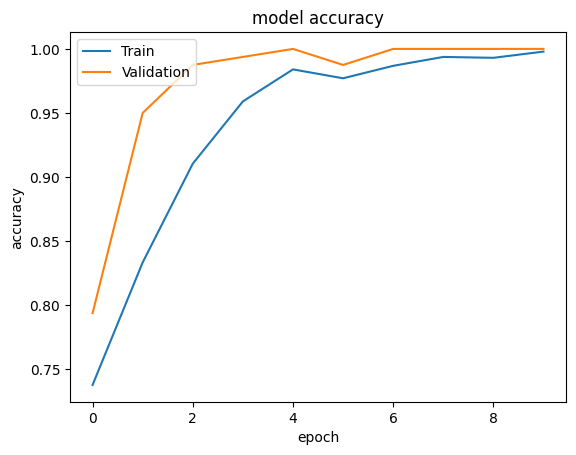

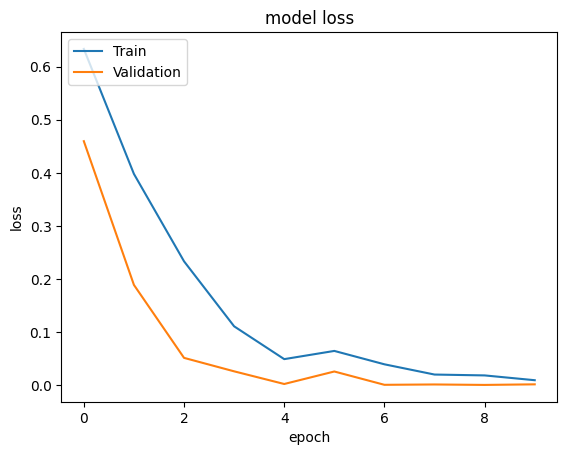

Testing model : /n
22/22 [==============================] - 17s 580ms/step


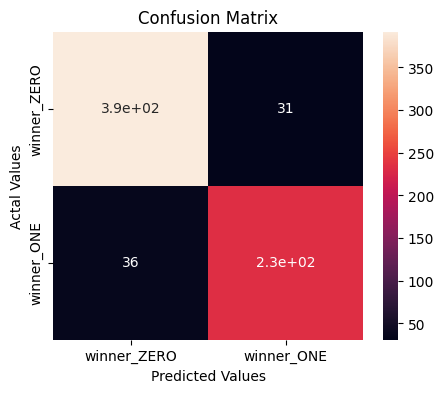

classification_report
               precision    recall  f1-score   support

           0       0.92      0.93      0.92       423
           1       0.88      0.87      0.87       270

    accuracy                           0.90       693
   macro avg       0.90      0.90      0.90       693
weighted avg       0.90      0.90      0.90       693

Epoch 1/10
45/45 [==============================] - 93s 2s/step - loss: 0.1914 - accuracy: 0.9298 - val_loss: 0.0192 - val_accuracy: 0.9937
Epoch 2/10
45/45 [==============================] - 80s 2s/step - loss: 0.0525 - accuracy: 0.9819 - val_loss: 0.0371 - val_accuracy: 0.9937
Epoch 3/10
45/45 [==============================] - 80s 2s/step - loss: 0.0387 - accuracy: 0.9868 - val_loss: 0.0068 - val_accuracy: 0.9937
Epoch 4/10
45/45 [==============================] - 82s 2s/step - loss: 0.0195 - accuracy: 0.9924 - val_loss: 5.8331e-04 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 80s 2s/step - loss: 0.0125 - accur

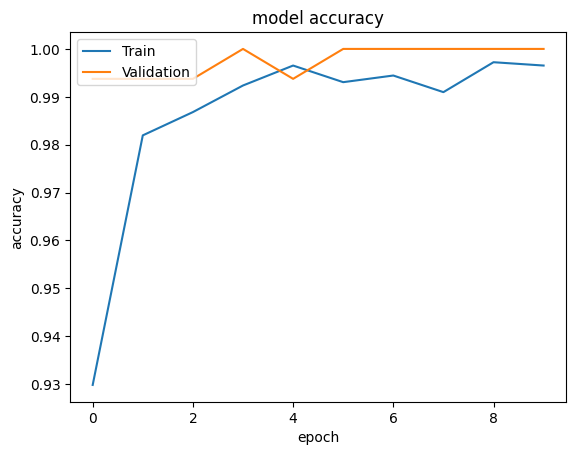

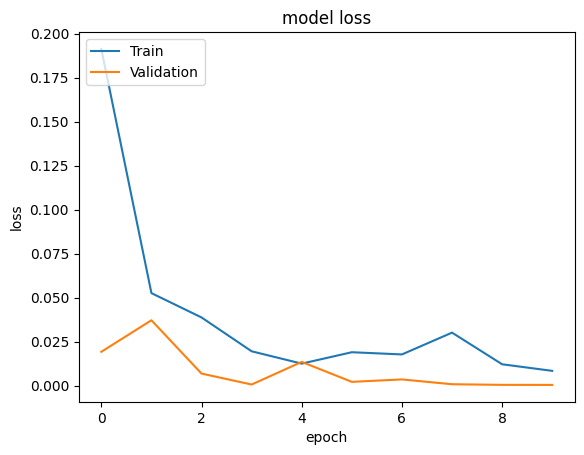

Testing model : /n
22/22 [==============================] - 16s 569ms/step


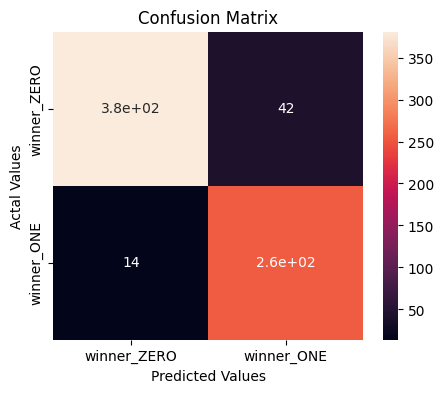

classification_report
               precision    recall  f1-score   support

           0       0.96      0.90      0.93       423
           1       0.86      0.95      0.90       270

    accuracy                           0.92       693
   macro avg       0.91      0.92      0.92       693
weighted avg       0.92      0.92      0.92       693

Epoch 1/10
45/45 [==============================] - 94s 2s/step - loss: 0.0311 - accuracy: 0.9944 - val_loss: 3.3406e-04 - val_accuracy: 1.0000
Epoch 2/10
45/45 [==============================] - 80s 2s/step - loss: 0.0085 - accuracy: 0.9951 - val_loss: 8.5052e-05 - val_accuracy: 1.0000
Epoch 3/10
45/45 [==============================] - 80s 2s/step - loss: 0.0102 - accuracy: 0.9972 - val_loss: 1.0680e-04 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 80s 2s/step - loss: 0.0122 - accuracy: 0.9972 - val_loss: 1.0760e-04 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 80s 2s/step - loss: 0.

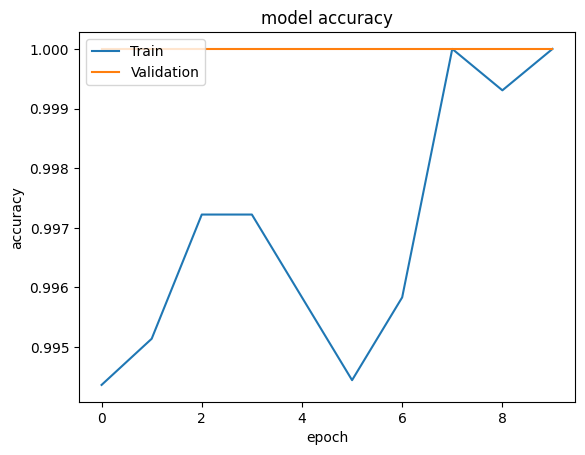

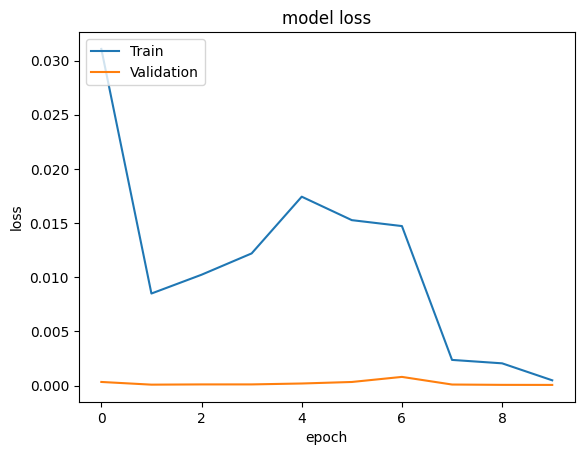

Testing model : /n
22/22 [==============================] - 15s 572ms/step


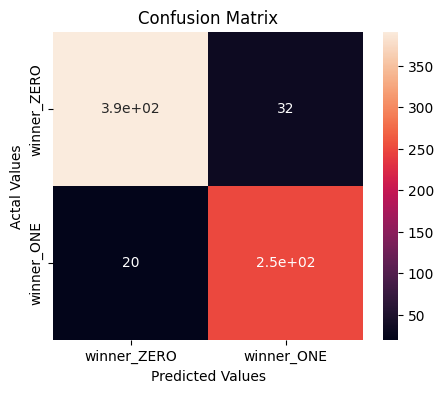

classification_report
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       423
           1       0.89      0.93      0.91       270

    accuracy                           0.92       693
   macro avg       0.92      0.93      0.92       693
weighted avg       0.93      0.92      0.93       693

Epoch 1/10
45/45 [==============================] - 93s 2s/step - loss: 0.0490 - accuracy: 0.9944 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 2/10
45/45 [==============================] - 80s 2s/step - loss: 0.0012 - accuracy: 0.9993 - val_loss: 6.4906e-05 - val_accuracy: 1.0000
Epoch 3/10
45/45 [==============================] - 82s 2s/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 5.8275e-05 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 80s 2s/step - loss: 0.0058 - accuracy: 0.9972 - val_loss: 6.5493e-05 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 82s 2s/step - loss: 0.0067

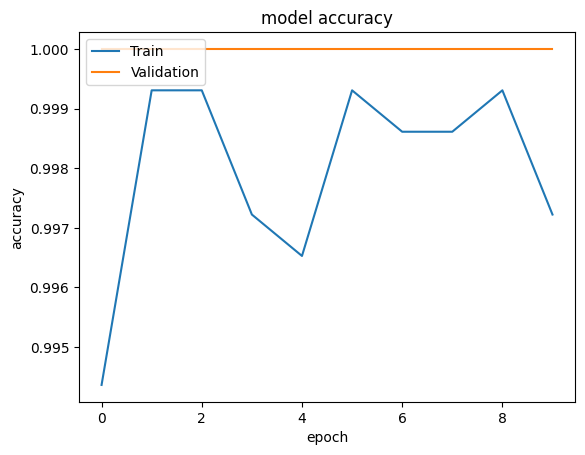

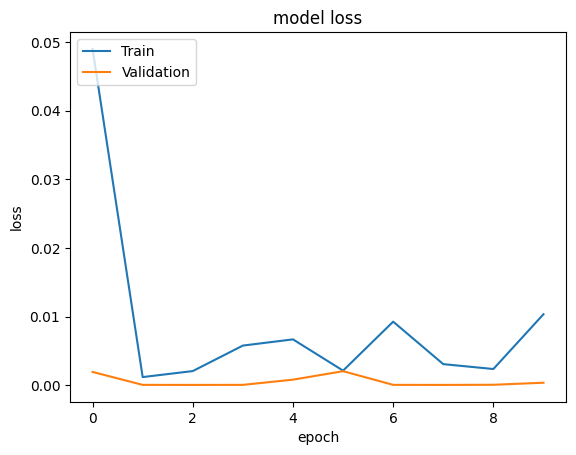

Testing model : /n
22/22 [==============================] - 15s 569ms/step


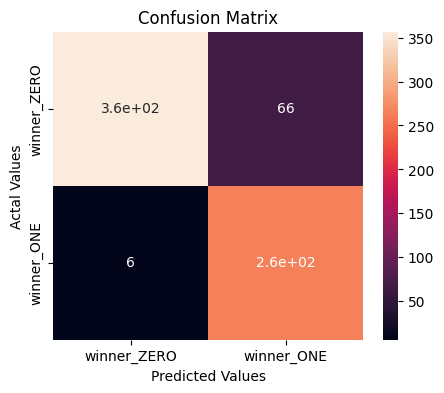

classification_report
               precision    recall  f1-score   support

           0       0.98      0.84      0.91       423
           1       0.80      0.98      0.88       270

    accuracy                           0.90       693
   macro avg       0.89      0.91      0.89       693
weighted avg       0.91      0.90      0.90       693

Acuuracy results of the 4 models :  [0.9033189033189033, 0.9191919191919192, 0.924963924963925, 0.8961038961038961]
Avrage accuracy of this probability = 0.9108946608946609


In [ ]:
#  preprocessing-  Balancing -   No Anonymisation (7)

dff = df
p = 0.9
dff_pred = df_pred

#---------------------------------

dff = balancing_func(dff)

preprocessing (dff)
preprocessing (dff_pred)

#--------------------------------

X_input_ids_pred = np.zeros((len(dff_pred), 256))
X_input_ids_pred = generate_training_data(dff_pred , X_input_ids_pred , tokenizer)
  
#-----------------------------------

train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4 = K_fold(dff)

#----------------------------------
train_set_1 = making_dataset(train_1)
train_size = int((len(train_1)/32)*p) 
train_1_dataset = train_set_1.take(train_size)
val_1_dataset = train_set_1.skip(train_size)

test_1_dataset = making_dataset(test_1)

train_set_2 = making_dataset(train_2)
train_size = int((len(train_2)/32)*p) 
train_2_dataset = train_set_2.take(train_size)
val_2_dataset = train_set_2.skip(train_size)

test_2_dataset = making_dataset(test_2)

train_set_3 = making_dataset(train_3)
train_size = int((len(train_3)/32)*p) 
train_3_dataset = train_set_3.take(train_size)
val_3_dataset = train_set_3.skip(train_size)

test_3_dataset = making_dataset(test_3)

train_set_4 = making_dataset(train_4)
train_size = int((len(train_4)/32)*p) 
train_4_dataset = train_set_4.take(train_size)
val_4_dataset = train_set_4.skip(train_size)

test_4_dataset= making_dataset(test_4)

#------------------------------------
acc_result = []

for i in range (4):
    
    if i == 0 :
        
        the_model_7_1 = creating_model(train_1_dataset,val_1_dataset,test_1_dataset)
        y_predict = the_model_7_1.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

        
    if i == 1 :
        the_model_7_2 = creating_model(train_2_dataset,val_2_dataset,test_2_dataset)
        y_predict = the_model_7_2.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

    if i == 2 :
        the_model_7_3 = creating_model(train_3_dataset,val_3_dataset,test_3_dataset)
        y_predict = the_model_7_3.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

    if i == 3 :
        the_model_7_4 = creating_model(train_4_dataset,val_4_dataset,test_4_dataset)
        y_predict = the_model_7_4.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])
        
    
print('Acuuracy results of the 4 models : ',acc_result)
print('Avrage accuracy of this probability =' , sum(acc_result)/len(acc_result))

probabilitiy_7=sum(acc_result)/len(acc_result)


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Epoch 1/10
45/45 [==============================] - 92s 2s/step - loss: 0.1061 - accuracy: 0.9739 - val_loss: 0.0137 - val_accuracy: 0.9937
Epoch 2/10
45/45 [==============================] - 80s 2s/step - loss: 0.0642 - accuracy: 0.9792 - val_loss: 0.0168 - val_accuracy: 0.9937
Epoch 3/10
45/45 [==============================] - 80s 2s/step - loss: 0.0159 - accuracy: 0.9951 - val_loss: 0.0145 - val_accuracy: 0.9937
Epoch 4/10
45/45 [==============================] - 82s 2s/step - loss: 0.0105 - accuracy: 0.9979 - val_loss: 4.9553e-04 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 80s 2s/step - loss: 0.0207 - accuracy: 0.9944 - val_loss: 3.7686e-04 - val_accuracy: 1.0000
Epoch 6/10
45/45 [==============================] - 80s 2s/step - loss: 0.0044 - accuracy: 0.9986 - val_loss: 3.2466e-04 - val_accuracy: 1.0000
Epoch 7/10
45/45 [==============================] - 80s 2s/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 2.7863e-04 - val_accuracy: 1.0000
Epoc

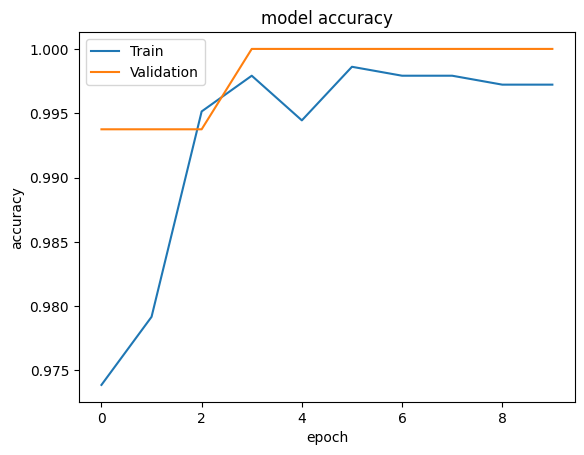

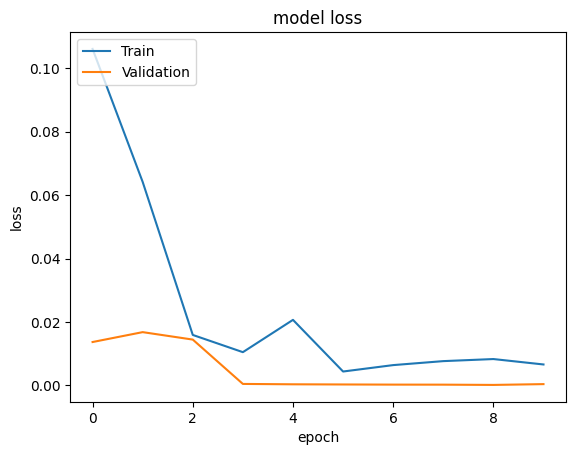

Testing model : /n
22/22 [==============================] - 15s 566ms/step


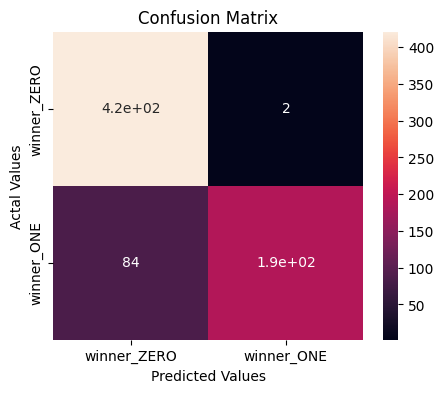

classification_report
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       423
           1       0.99      0.69      0.81       270

    accuracy                           0.88       693
   macro avg       0.91      0.84      0.86       693
weighted avg       0.89      0.88      0.87       693

Epoch 1/10
45/45 [==============================] - 92s 2s/step - loss: 0.0776 - accuracy: 0.9759 - val_loss: 7.0110e-05 - val_accuracy: 1.0000
Epoch 2/10
45/45 [==============================] - 80s 2s/step - loss: 0.0281 - accuracy: 0.9937 - val_loss: 4.5331e-04 - val_accuracy: 1.0000
Epoch 3/10
45/45 [==============================] - 80s 2s/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 3.5033e-04 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 80s 2s/step - loss: 0.0091 - accuracy: 0.9958 - val_loss: 1.2312e-04 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 79s 2s/step - loss: 0.

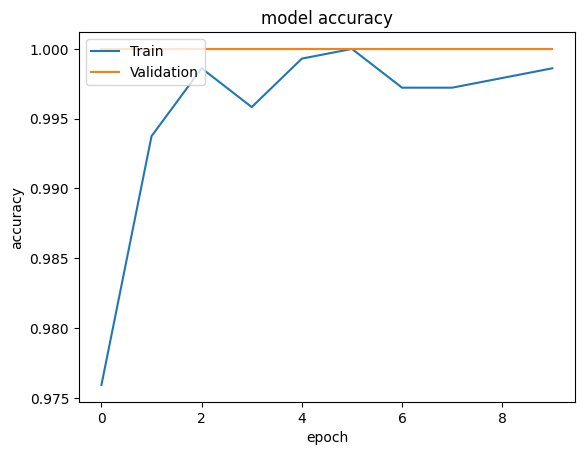

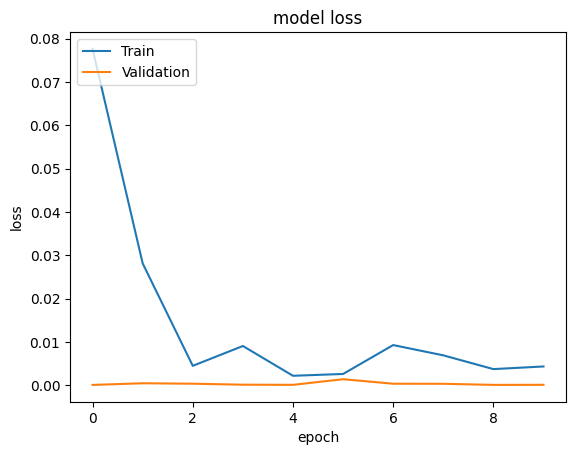

Testing model : /n
22/22 [==============================] - 16s 572ms/step


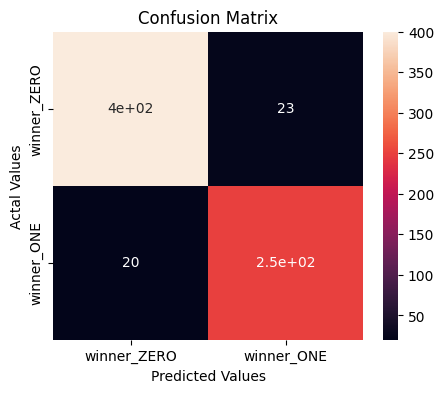

classification_report
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       423
           1       0.92      0.93      0.92       270

    accuracy                           0.94       693
   macro avg       0.93      0.94      0.93       693
weighted avg       0.94      0.94      0.94       693

Epoch 1/10
45/45 [==============================] - 91s 2s/step - loss: 0.0628 - accuracy: 0.9754 - val_loss: 1.2112e-04 - val_accuracy: 1.0000
Epoch 2/10
45/45 [==============================] - 80s 2s/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 1.3683e-04 - val_accuracy: 1.0000
Epoch 3/10
45/45 [==============================] - 80s 2s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 7.1596e-05 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 80s 2s/step - loss: 7.8240e-04 - accuracy: 1.0000 - val_loss: 6.9458e-05 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 80s 2s/step - loss

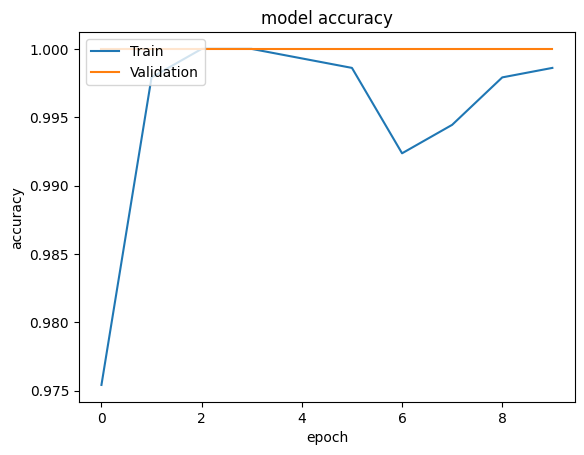

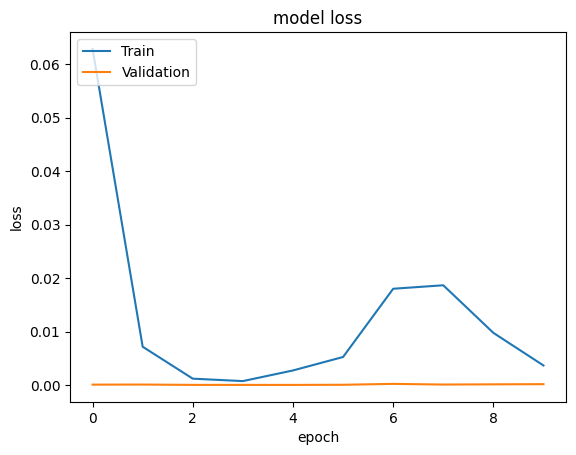

Testing model : /n
22/22 [==============================] - 15s 573ms/step


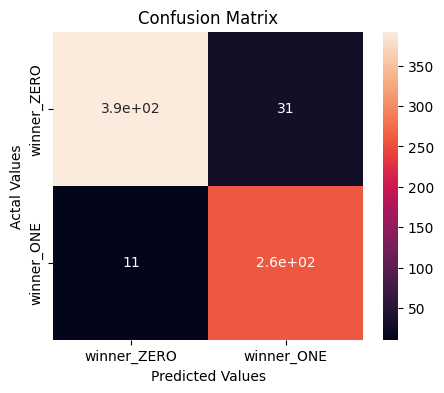

classification_report
               precision    recall  f1-score   support

           0       0.97      0.93      0.95       423
           1       0.89      0.96      0.92       270

    accuracy                           0.94       693
   macro avg       0.93      0.94      0.94       693
weighted avg       0.94      0.94      0.94       693

Epoch 1/10
45/45 [==============================] - 95s 2s/step - loss: 0.0495 - accuracy: 0.9831 - val_loss: 8.0580e-05 - val_accuracy: 1.0000
Epoch 2/10
45/45 [==============================] - 80s 2s/step - loss: 0.0080 - accuracy: 0.9965 - val_loss: 9.1253e-05 - val_accuracy: 1.0000
Epoch 3/10
45/45 [==============================] - 80s 2s/step - loss: 0.0119 - accuracy: 0.9979 - val_loss: 9.9782e-05 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 80s 2s/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 8.5996e-05 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 82s 2s/step - loss: 0.

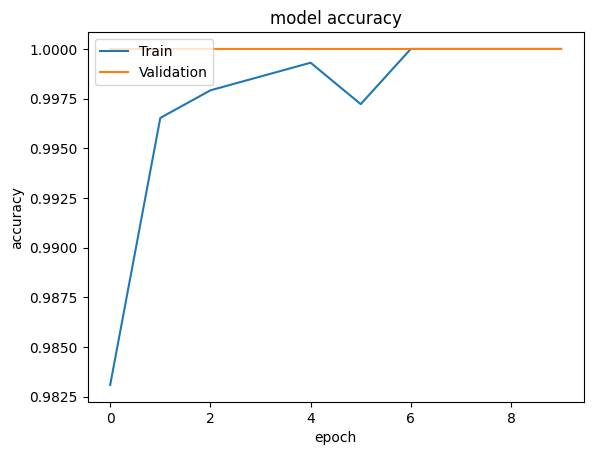

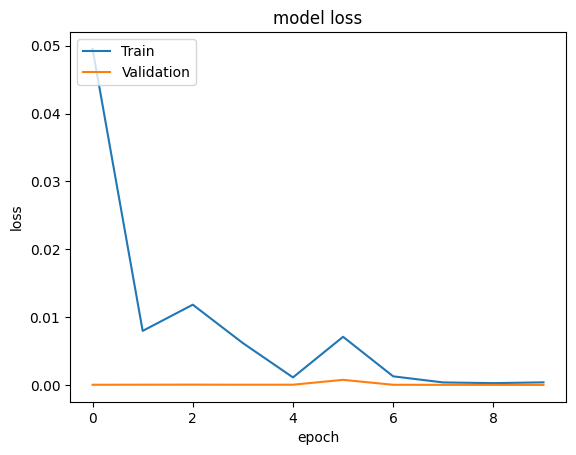

Testing model : /n
22/22 [==============================] - 15s 569ms/step


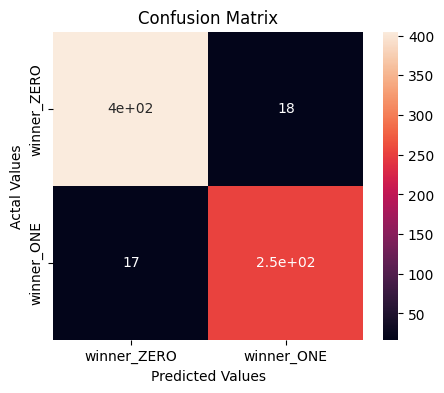

classification_report
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       423
           1       0.93      0.94      0.94       270

    accuracy                           0.95       693
   macro avg       0.95      0.95      0.95       693
weighted avg       0.95      0.95      0.95       693

Acuuracy results of the 4 models :  [0.8759018759018758, 0.937950937950938, 0.9393939393939394, 0.9494949494949495]
Avrage accuracy of this probability = 0.9256854256854257


In [ ]:
#  preprocessing-  Balancing -    Anonymisation (8)

dff = df
p = 0.9
dff_pred = df_pred

#---------------------------------

dff = balancing_func(dff)

for i in range (len(dff)):
    dff['Facts'].iloc[i] = anonymisation(dff['Facts'].iloc[i] , dff['first_party'].iloc[i] , dff['second_party'].iloc[i])

for i in range (len(dff_pred)):
    dff_pred['Facts'].iloc[i] = anonymisation(dff_pred['Facts'].iloc[i], dff_pred['first_party'].iloc[i] , dff_pred['second_party'].iloc[i])

preprocessing (dff)
preprocessing (dff_pred)

#--------------------------------

X_input_ids_pred = np.zeros((len(dff_pred), 256))
X_input_ids_pred = generate_training_data(dff_pred , X_input_ids_pred , tokenizer)

#-----------------------------------

train_1,test_1,train_2,test_2,train_3,test_3,train_4,test_4 = K_fold(dff)

#----------------------------------
train_set_1 = making_dataset(train_1)
train_size = int((len(train_1)/32)*p) 
train_1_dataset = train_set_1.take(train_size)
val_1_dataset = train_set_1.skip(train_size)

test_1_dataset = making_dataset(test_1)

train_set_2 = making_dataset(train_2)
train_size = int((len(train_2)/32)*p) 
train_2_dataset = train_set_2.take(train_size)
val_2_dataset = train_set_2.skip(train_size)

test_2_dataset = making_dataset(test_2)

train_set_3 = making_dataset(train_3)
train_size = int((len(train_3)/32)*p) 
train_3_dataset = train_set_3.take(train_size)
val_3_dataset = train_set_3.skip(train_size)

test_3_dataset = making_dataset(test_3)

train_set_4 = making_dataset(train_4)
train_size = int((len(train_4)/32)*p) 
train_4_dataset = train_set_4.take(train_size)
val_4_dataset = train_set_4.skip(train_size)

test_4_dataset= making_dataset(test_4)

#------------------------------------
acc_result = []

for i in range (4):
    
    if i == 0 :
        
        the_model_8_1 = creating_model(train_1_dataset,val_1_dataset,test_1_dataset)
        y_predict = the_model_8_1.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

        
    if i == 1 :
        the_model_8_2 = creating_model(train_2_dataset,val_2_dataset,test_2_dataset)
        y_predict = the_model_8_2.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

    if i == 2 :
        the_model_8_3 = creating_model(train_3_dataset,val_3_dataset,test_3_dataset)
        y_predict = the_model_8_3.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])

    if i == 3 :
        the_model_8_4 = creating_model(train_4_dataset,val_4_dataset,test_4_dataset)
        y_predict = the_model_8_4.predict(X_input_ids_pred)
        y_predict = np.argmax(y_predict,axis=1)
    
        cm = confusion_matrix(target_labels_pred,y_predict)
        cm_df = pd.DataFrame(cm,index = ['winner_ZERO','winner_ONE'], columns = ['winner_ZERO','winner_ONE'])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        print('classification_report\n',classification_report(target_labels_pred,y_predict))
        report = classification_report(target_labels_pred,y_predict,output_dict=True)
        acc_result.append(report['accuracy'])
        
    
print('Acuuracy results of the 4 models : ',acc_result)
print('Avrage accuracy of this probability =' , sum(acc_result)/len(acc_result))

probabilitiy_8=sum(acc_result)/len(acc_result)


In [33]:
import pickle
pickle.dump(the_model_1_2,open('bestBERT.pkl','wb'))

In [ ]:
def convert_text (text):

  tokenn = tokenizer.encode_plus(text ,
      max_length=256,
      truncation = True,
      padding='max_length',
      add_special_tokens=True,
      return_tensors='tf')
  return tokenn.input_ids

x=df['Facts'].iloc[20]

xx=convert_text(x)

y=the_model_2_3.predict(xx)
y


1/1 [==============================] - 5s 5s/step


array([[0.9793178 , 0.02068222]], dtype=float32)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')